## Navigate to the Correct Directory

The following code navigates to the dataprocessing directory.

In [1]:
cd ../dataprocessing

/Users/carverforbes/internships/google/gunshot-detection/activity-recognition/location/lbs/activity/audioset/dataprocessing


## Call the import statements

The following code imports the necessary code to run the code in the rest of this notebook.

In [2]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

/Users/carverforbes/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Ran the import statements.


In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'test_set2'
labels = ['Gunshot, gunfire']
available_features = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate'
]
features_to_extract = ['rms']

In [5]:
# Import the dataset
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, False)

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:extracted features
INFO:absl:(15, 19.628261)
INFO:absl:extracted features
INFO:absl:(16, 20.132073)
INFO:absl:extracted features
INFO:absl:(17, 20.636334)
INFO:absl:extracted features
INFO:absl:(18, 21.125038)
INFO:absl:extracted features
INFO:absl:(19, 21.633386)
INFO:absl:extracted features
INFO:absl:(20, 22.123303)
INFO:absl:extracted features
INFO:absl:(21, 22.628123)
INFO:absl:extracted features
INFO:absl:(22, 23.118251)
INFO:absl:extracted features
INFO:absl:(23, 23.614356)
INFO:absl:extracted features
INFO:absl:(24, 24.122835)
INFO:absl:extracted features
INFO:absl:(25, 24.628486)
INFO:absl:extracted features
INFO:absl:(26, 25.115903)
INFO:absl:extracted features
INFO:absl:(27, 25.622932)
INFO:absl:extracted features
INFO:absl:(28, 26.128302)
INFO:absl:extracted features
INFO:absl:(29, 26.634193)
INFO:absl:extracted features
INFO:absl:(30, 27.139242)
INFO:absl:extracted features
INFO:absl:(31, 27.635152)
INFO:absl:extracted features
INFO:absl:(32, 28.141748)
INFO:absl:

INFO:absl:(162, 92.014785)
INFO:absl:extracted features
INFO:absl:(163, 92.517356)
INFO:absl:extracted features
INFO:absl:(164, 93.019009)
INFO:absl:extracted features
INFO:absl:(165, 93.525674)
INFO:absl:extracted features
INFO:absl:(166, 94.031748)
INFO:absl:extracted features
INFO:absl:(167, 94.537382)
INFO:absl:extracted features
INFO:absl:(168, 95.018707)
INFO:absl:extracted features
INFO:absl:(169, 95.52426)
INFO:absl:extracted features
INFO:absl:(170, 96.030268)
INFO:absl:extracted features
INFO:absl:(171, 96.53682)
INFO:absl:extracted features
INFO:absl:(172, 97.024751)
INFO:absl:extracted features
INFO:absl:(173, 97.527848)
INFO:absl:extracted features
INFO:absl:(174, 98.015651)
INFO:absl:extracted features
INFO:absl:(175, 98.513114)
INFO:absl:extracted features
INFO:absl:(176, 99.021221)
INFO:absl:extracted features
INFO:absl:(177, 99.531653)
INFO:absl:extracted features
INFO:absl:(178, 100.0226)
INFO:absl:extracted features
INFO:absl:(179, 100.550484)
INFO:absl:extracted fea

INFO:absl:extracted features
INFO:absl:(307, 164.855369)
INFO:absl:extracted features
INFO:absl:(308, 165.361621)
INFO:absl:extracted features
INFO:absl:(309, 165.866916)
INFO:absl:extracted features
INFO:absl:(310, 166.347892)
INFO:absl:extracted features
INFO:absl:(311, 166.854131)
INFO:absl:extracted features
INFO:absl:(312, 167.358955)
INFO:absl:extracted features
INFO:absl:(313, 167.862455)
INFO:absl:extracted features
INFO:absl:(314, 168.364842)
INFO:absl:extracted features
INFO:absl:(315, 168.869198)
INFO:absl:extracted features
INFO:absl:(316, 169.366857)
INFO:absl:extracted features
INFO:absl:(317, 169.856478)
INFO:absl:extracted features
INFO:absl:(318, 170.343794)
INFO:absl:extracted features
INFO:absl:(319, 170.802049)
INFO:absl:extracted features
INFO:absl:(320, 171.310712)
INFO:absl:extracted features
INFO:absl:(321, 171.810879)
INFO:absl:extracted features
INFO:absl:(322, 172.315146)
INFO:absl:extracted features
INFO:absl:(323, 172.805978)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(451, 236.414521)
INFO:absl:extracted features
INFO:absl:(452, 236.956224)
INFO:absl:extracted features
INFO:absl:(453, 237.452873)
INFO:absl:extracted features
INFO:absl:(454, 237.96168)
INFO:absl:extracted features
INFO:absl:(455, 238.472959)
INFO:absl:extracted features
INFO:absl:(456, 238.980947)
INFO:absl:extracted features
INFO:absl:(457, 239.48752)
INFO:absl:extracted features
INFO:absl:(458, 239.986571)
INFO:absl:extracted features
INFO:absl:(459, 240.489841)
INFO:absl:extracted features
INFO:absl:(460, 240.995671)
INFO:absl:extracted features
INFO:absl:(461, 241.50866)
INFO:absl:extracted features
INFO:absl:(462, 242.008385)
INFO:absl:extracted features
INFO:absl:(463, 242.514471)
INFO:absl:extracted features
INFO:absl:(464, 242.975476)
INFO:absl:extracted features
INFO:absl:(465, 243.478566)
INFO:absl:extracted features
INFO:absl:(466, 243.988514)
INFO:absl:extracted features
INFO:absl:(467, 244.498936)
INFO:absl:extracted features
INFO:

INFO:absl:(595, 307.619243)
INFO:absl:extracted features
INFO:absl:(596, 308.092786)
INFO:absl:extracted features
INFO:absl:(597, 308.598475)
INFO:absl:extracted features
INFO:absl:(598, 309.104754)
INFO:absl:extracted features
INFO:absl:(599, 309.587536)
INFO:absl:extracted features
INFO:absl:(600, 310.089319)
INFO:absl:extracted features
INFO:absl:(601, 310.597942)
INFO:absl:extracted features
INFO:absl:(602, 311.079137)
INFO:absl:extracted features
INFO:absl:(603, 311.574721)
INFO:absl:extracted features
INFO:absl:(604, 312.061272)
INFO:absl:extracted features
INFO:absl:(605, 312.568443)
INFO:absl:extracted features
INFO:absl:(606, 313.073161)
INFO:absl:extracted features
INFO:absl:(607, 313.576004)
INFO:absl:extracted features
INFO:absl:(608, 314.055682)
INFO:absl:extracted features
INFO:absl:(609, 314.562848)
INFO:absl:extracted features
INFO:absl:(610, 315.074439)
INFO:absl:extracted features
INFO:absl:(611, 315.535985)
INFO:absl:extracted features
INFO:absl:(612, 316.039284)
INF

INFO:absl:(739, 378.696179)
INFO:absl:extracted features
INFO:absl:(740, 379.198093)
INFO:absl:extracted features
INFO:absl:(741, 379.697638)
INFO:absl:extracted features
INFO:absl:(742, 380.187977)
INFO:absl:extracted features
INFO:absl:(743, 380.693209)
INFO:absl:extracted features
INFO:absl:(744, 381.200199)
INFO:absl:extracted features
INFO:absl:(745, 381.686483)
INFO:absl:extracted features
INFO:absl:(746, 382.175362)
INFO:absl:extracted features
INFO:absl:(747, 382.680163)
INFO:absl:extracted features
INFO:absl:(748, 383.185796)
INFO:absl:extracted features
INFO:absl:(749, 383.669207)
INFO:absl:extracted features
INFO:absl:(750, 384.174194)
INFO:absl:extracted features
INFO:absl:(751, 384.66372)
INFO:absl:extracted features
INFO:absl:(752, 385.16649)
INFO:absl:extracted features
INFO:absl:(753, 385.622227)
INFO:absl:extracted features
INFO:absl:(754, 386.114625)
INFO:absl:extracted features
INFO:absl:(755, 386.615981)
INFO:absl:extracted features
INFO:absl:(756, 387.125624)
INFO:

INFO:absl:(883, 450.208316)
INFO:absl:extracted features
INFO:absl:(884, 450.715564)
INFO:absl:extracted features
INFO:absl:(885, 451.212547)
INFO:absl:extracted features
INFO:absl:(886, 451.697266)
INFO:absl:extracted features
INFO:absl:(887, 452.203264)
INFO:absl:extracted features
INFO:absl:(888, 452.710198)
INFO:absl:extracted features
INFO:absl:(889, 453.19518)
INFO:absl:extracted features
INFO:absl:(890, 453.702303)
INFO:absl:extracted features
INFO:absl:(891, 454.179499)
INFO:absl:extracted features
INFO:absl:(892, 454.668842)
INFO:absl:extracted features
INFO:absl:(893, 455.175806)
INFO:absl:extracted features
INFO:absl:(894, 455.672423)
INFO:absl:extracted features
INFO:absl:(895, 456.179241)
INFO:absl:extracted features
INFO:absl:(896, 456.685855)
INFO:absl:extracted features
INFO:absl:(897, 456.936741)
INFO:absl:extracted features
INFO:absl:(898, 457.424551)
INFO:absl:extracted features
INFO:absl:(899, 457.87589)
INFO:absl:extracted features
INFO:absl:(900, 458.383309)
INFO:

INFO:absl:(1026, 519.939584)
INFO:absl:extracted features
INFO:absl:(1027, 520.430038)
INFO:absl:extracted features
INFO:absl:(1028, 520.936992)
INFO:absl:extracted features
INFO:absl:(1029, 521.44232)
INFO:absl:extracted features
INFO:absl:(1030, 521.940951)
INFO:absl:extracted features
INFO:absl:(1031, 522.45302)
INFO:absl:extracted features
INFO:absl:(1032, 522.941661)
INFO:absl:extracted features
INFO:absl:(1033, 523.433736)
INFO:absl:extracted features
INFO:absl:(1034, 523.939256)
INFO:absl:extracted features
INFO:absl:(1035, 524.428427)
INFO:absl:extracted features
INFO:absl:(1036, 524.810477)
INFO:absl:extracted features
INFO:absl:(1037, 525.286438)
INFO:absl:extracted features
INFO:absl:(1038, 525.777578)
INFO:absl:extracted features
INFO:absl:(1039, 526.268611)
INFO:absl:extracted features
INFO:absl:(1040, 526.773168)
INFO:absl:extracted features
INFO:absl:(1041, 527.269606)
INFO:absl:extracted features
INFO:absl:(1042, 527.753231)
INFO:absl:extracted features
INFO:absl:(1043,

INFO:absl:(1168, 590.436864)
INFO:absl:extracted features
INFO:absl:(1169, 590.938535)
INFO:absl:extracted features
INFO:absl:(1170, 591.40013)
INFO:absl:extracted features
INFO:absl:(1171, 591.911424)
INFO:absl:extracted features
INFO:absl:(1172, 592.419878)
INFO:absl:extracted features
INFO:absl:(1173, 592.923885)
INFO:absl:extracted features
INFO:absl:(1174, 593.435536)
INFO:absl:extracted features
INFO:absl:(1175, 593.947763)
INFO:absl:extracted features
INFO:absl:(1176, 594.453894)
INFO:absl:extracted features
INFO:absl:(1177, 594.940008)
INFO:absl:extracted features
INFO:absl:(1178, 595.433993)
INFO:absl:extracted features
INFO:absl:(1179, 595.940766)
INFO:absl:extracted features
INFO:absl:(1180, 596.443531)
INFO:absl:extracted features
INFO:absl:(1181, 596.949176)
INFO:absl:extracted features
INFO:absl:(1182, 597.44505)
INFO:absl:extracted features
INFO:absl:(1183, 597.949964)
INFO:absl:extracted features
INFO:absl:(1184, 598.431305)
INFO:absl:extracted features
INFO:absl:(1185,

INFO:absl:(1310, 660.778971)
INFO:absl:extracted features
INFO:absl:(1311, 661.268805)
INFO:absl:extracted features
INFO:absl:(1312, 661.760083)
INFO:absl:extracted features
INFO:absl:(1313, 662.269366)
INFO:absl:extracted features
INFO:absl:(1314, 662.774953)
INFO:absl:extracted features
INFO:absl:(1315, 663.262928)
INFO:absl:extracted features
INFO:absl:(1316, 663.772151)
INFO:absl:extracted features
INFO:absl:(1317, 664.28446)
INFO:absl:extracted features
INFO:absl:(1318, 664.794075)
INFO:absl:extracted features
INFO:absl:(1319, 665.303784)
INFO:absl:extracted features
INFO:absl:(1320, 665.761172)
INFO:absl:extracted features
INFO:absl:(1321, 666.250984)
INFO:absl:extracted features
INFO:absl:(1322, 666.749424)
INFO:absl:extracted features
INFO:absl:(1323, 667.257036)
INFO:absl:extracted features
INFO:absl:(1324, 667.743622)
INFO:absl:extracted features
INFO:absl:(1325, 668.253031)
INFO:absl:extracted features
INFO:absl:(1326, 668.760825)
INFO:absl:extracted features
INFO:absl:(1327

INFO:absl:(1452, 730.430235)
INFO:absl:extracted features
INFO:absl:(1453, 730.920832)
INFO:absl:extracted features
INFO:absl:(1454, 731.430159)
INFO:absl:extracted features
INFO:absl:(1455, 731.934067)
INFO:absl:extracted features
INFO:absl:(1456, 732.437055)
INFO:absl:extracted features
INFO:absl:(1457, 732.924378)
INFO:absl:extracted features
INFO:absl:(1458, 733.390663)
INFO:absl:extracted features
INFO:absl:(1459, 733.89476)
INFO:absl:extracted features
INFO:absl:(1460, 734.359061)
INFO:absl:extracted features
INFO:absl:(1461, 734.868436)
INFO:absl:extracted features
INFO:absl:(1462, 735.375268)
INFO:absl:extracted features
INFO:absl:(1463, 735.879646)
INFO:absl:extracted features
INFO:absl:(1464, 736.372017)
INFO:absl:extracted features
INFO:absl:(1465, 736.866312)
INFO:absl:extracted features
INFO:absl:(1466, 737.372919)
INFO:absl:extracted features
INFO:absl:(1467, 737.869757)
INFO:absl:extracted features
INFO:absl:(1468, 738.375798)
INFO:absl:extracted features
INFO:absl:(1469

INFO:absl:(1594, 800.815161)
INFO:absl:extracted features
INFO:absl:(1595, 801.321361)
INFO:absl:extracted features
INFO:absl:(1596, 801.811537)
INFO:absl:extracted features
INFO:absl:(1597, 802.307188)
INFO:absl:extracted features
INFO:absl:(1598, 802.791307)
INFO:absl:extracted features
INFO:absl:(1599, 803.2979)
INFO:absl:extracted features
INFO:absl:(1600, 803.801895)
INFO:absl:extracted features
INFO:absl:(1601, 804.309244)
INFO:absl:extracted features
INFO:absl:(1602, 804.817294)
INFO:absl:extracted features
INFO:absl:(1603, 805.323474)
INFO:absl:extracted features
INFO:absl:(1604, 805.827794)
INFO:absl:extracted features
INFO:absl:(1605, 806.29334)
INFO:absl:extracted features
INFO:absl:(1606, 806.798946)
INFO:absl:extracted features
INFO:absl:(1607, 807.291009)
INFO:absl:extracted features
INFO:absl:(1608, 807.746016)
INFO:absl:extracted features
INFO:absl:(1609, 808.239736)
INFO:absl:extracted features
INFO:absl:(1610, 808.747853)
INFO:absl:extracted features
INFO:absl:(1611, 

INFO:absl:(1736, 870.828782)
INFO:absl:extracted features
INFO:absl:(1737, 871.340074)
INFO:absl:extracted features
INFO:absl:(1738, 871.853011)
INFO:absl:extracted features
INFO:absl:(1739, 872.317206)
INFO:absl:extracted features
INFO:absl:(1740, 872.811914)
INFO:absl:extracted features
INFO:absl:(1741, 873.276684)
INFO:absl:extracted features
INFO:absl:(1742, 873.785852)
INFO:absl:extracted features
INFO:absl:(1743, 874.281402)
INFO:absl:extracted features
INFO:absl:(1744, 874.77847)
INFO:absl:extracted features
INFO:absl:(1745, 875.273534)
INFO:absl:extracted features
INFO:absl:(1746, 875.75976)
INFO:absl:extracted features
INFO:absl:(1747, 876.269026)
INFO:absl:extracted features
INFO:absl:(1748, 876.757243)
INFO:absl:extracted features
INFO:absl:(1749, 877.243771)
INFO:absl:extracted features
INFO:absl:(1750, 877.729203)
INFO:absl:extracted features
INFO:absl:(1751, 878.233147)
INFO:absl:extracted features
INFO:absl:(1752, 878.748504)
INFO:absl:extracted features
INFO:absl:(1753,

INFO:absl:(1878, 942.12177)
INFO:absl:extracted features
INFO:absl:(1879, 942.626206)
INFO:absl:extracted features
INFO:absl:(1880, 943.129123)
INFO:absl:extracted features
INFO:absl:(1881, 943.633813)
INFO:absl:extracted features
INFO:absl:(1882, 944.565441)
INFO:absl:extracted features
INFO:absl:(1883, 945.19614)
INFO:absl:extracted features
INFO:absl:(1884, 945.889489)
INFO:absl:extracted features
INFO:absl:(1885, 946.722585)
INFO:absl:extracted features
INFO:absl:(1886, 947.228132)
INFO:absl:extracted features
INFO:absl:(1887, 947.714579)
INFO:absl:extracted features
INFO:absl:(1888, 948.224039)
INFO:absl:extracted features
INFO:absl:(1889, 948.729521)
INFO:absl:extracted features
INFO:absl:(1890, 949.223345)
INFO:absl:extracted features
INFO:absl:(1891, 949.730846)
INFO:absl:extracted features
INFO:absl:(1892, 950.235302)
INFO:absl:extracted features
INFO:absl:(1893, 950.732501)
INFO:absl:extracted features
INFO:absl:(1894, 951.227025)
INFO:absl:extracted features
INFO:absl:(1895,

INFO:absl:extracted features
INFO:absl:(2020, 1013.973139)
INFO:absl:extracted features
INFO:absl:(2021, 1014.483197)
INFO:absl:extracted features
INFO:absl:(2022, 1014.984377)
INFO:absl:extracted features
INFO:absl:(2023, 1015.471964)
INFO:absl:extracted features
INFO:absl:(2024, 1015.963336)
INFO:absl:extracted features
INFO:absl:(2025, 1016.464829)
INFO:absl:extracted features
INFO:absl:(2026, 1016.970814)
INFO:absl:extracted features
INFO:absl:(2027, 1017.486172)
INFO:absl:extracted features
INFO:absl:(2028, 1018.001409)
INFO:absl:extracted features
INFO:absl:(2029, 1018.518046)
INFO:absl:extracted features
INFO:absl:(2030, 1019.038252)
INFO:absl:extracted features
INFO:absl:(2031, 1019.537394)
INFO:absl:extracted features
INFO:absl:(2032, 1020.043514)
INFO:absl:extracted features
INFO:absl:(2033, 1020.528177)
INFO:absl:extracted features
INFO:absl:(2034, 1021.019644)
INFO:absl:extracted features
INFO:absl:(2035, 1021.512636)
INFO:absl:extracted features
INFO:absl:(2036, 1022.0011)

INFO:absl:(2159, 1084.144821)
INFO:absl:extracted features
INFO:absl:(2160, 1084.634867)
INFO:absl:extracted features
INFO:absl:(2161, 1085.121603)
INFO:absl:extracted features
INFO:absl:(2162, 1085.607182)
INFO:absl:extracted features
INFO:absl:(2163, 1086.113494)
INFO:absl:extracted features
INFO:absl:(2164, 1086.621696)
INFO:absl:extracted features
INFO:absl:(2165, 1087.113895)
INFO:absl:extracted features
INFO:absl:(2166, 1087.620038)
INFO:absl:extracted features
INFO:absl:(2167, 1088.126206)
INFO:absl:extracted features
INFO:absl:(2168, 1088.631366)
INFO:absl:extracted features
INFO:absl:(2169, 1089.132863)
INFO:absl:extracted features
INFO:absl:(2170, 1089.633237)
INFO:absl:extracted features
INFO:absl:(2171, 1090.117612)
INFO:absl:extracted features
INFO:absl:(2172, 1090.606475)
INFO:absl:extracted features
INFO:absl:(2173, 1091.111036)
INFO:absl:extracted features
INFO:absl:(2174, 1091.616905)
INFO:absl:extracted features
INFO:absl:(2175, 1092.121969)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(2299, 1153.48849)
INFO:absl:extracted features
INFO:absl:(2300, 1154.002696)
INFO:absl:extracted features
INFO:absl:(2301, 1154.514625)
INFO:absl:extracted features
INFO:absl:(2302, 1155.006097)
INFO:absl:extracted features
INFO:absl:(2303, 1155.516477)
INFO:absl:extracted features
INFO:absl:(2304, 1156.022784)
INFO:absl:extracted features
INFO:absl:(2305, 1156.52706)
INFO:absl:extracted features
INFO:absl:(2306, 1157.033994)
INFO:absl:extracted features
INFO:absl:(2307, 1157.540748)
INFO:absl:extracted features
INFO:absl:(2308, 1158.046899)
INFO:absl:extracted features
INFO:absl:(2309, 1158.553611)
INFO:absl:extracted features
INFO:absl:(2310, 1159.041318)
INFO:absl:extracted features
INFO:absl:(2311, 1159.547653)
INFO:absl:extracted features
INFO:absl:(2312, 1160.056474)
INFO:absl:extracted features
INFO:absl:(2313, 1160.554627)
INFO:absl:extracted features
INFO:absl:(2314, 1161.059185)
INFO:absl:extracted features
INFO:absl:(2315, 1161.568265)

INFO:absl:(2437, 1221.11341)
INFO:absl:extracted features
INFO:absl:(2438, 1221.6164)
INFO:absl:extracted features
INFO:absl:(2439, 1222.125843)
INFO:absl:extracted features
INFO:absl:(2440, 1222.619988)
INFO:absl:extracted features
INFO:absl:(2441, 1223.127449)
INFO:absl:extracted features
INFO:absl:(2442, 1223.629166)
INFO:absl:extracted features
INFO:absl:(2443, 1224.112716)
INFO:absl:extracted features
INFO:absl:(2444, 1224.57463)
INFO:absl:extracted features
INFO:absl:(2445, 1225.079553)
INFO:absl:extracted features
INFO:absl:(2446, 1225.585517)
INFO:absl:extracted features
INFO:absl:(2447, 1226.089649)
INFO:absl:extracted features
INFO:absl:(2448, 1226.535981)
INFO:absl:extracted features
INFO:absl:(2449, 1227.042284)
INFO:absl:extracted features
INFO:absl:(2450, 1227.548929)
INFO:absl:extracted features
INFO:absl:(2451, 1228.053688)
INFO:absl:extracted features
INFO:absl:(2452, 1228.55866)
INFO:absl:extracted features
INFO:absl:(2453, 1229.073913)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(2577, 1290.773)
INFO:absl:extracted features
INFO:absl:(2578, 1291.264892)
INFO:absl:extracted features
INFO:absl:(2579, 1291.753987)
INFO:absl:extracted features
INFO:absl:(2580, 1292.258157)
INFO:absl:extracted features
INFO:absl:(2581, 1292.756545)
INFO:absl:extracted features
INFO:absl:(2582, 1293.263371)
INFO:absl:extracted features
INFO:absl:(2583, 1293.768771)
INFO:absl:extracted features
INFO:absl:(2584, 1294.229256)
INFO:absl:extracted features
INFO:absl:(2585, 1294.737075)
INFO:absl:extracted features
INFO:absl:(2586, 1295.246945)
INFO:absl:extracted features
INFO:absl:(2587, 1295.751187)
INFO:absl:extracted features
INFO:absl:(2588, 1296.239813)
INFO:absl:extracted features
INFO:absl:(2589, 1296.74413)
INFO:absl:extracted features
INFO:absl:(2590, 1297.235559)
INFO:absl:extracted features
INFO:absl:(2591, 1297.74187)
INFO:absl:extracted features
INFO:absl:(2592, 1298.242874)
INFO:absl:extracted features
INFO:absl:(2593, 1298.729913)
IN

INFO:absl:(2716, 1361.415248)
INFO:absl:extracted features
INFO:absl:(2717, 1361.918523)
INFO:absl:extracted features
INFO:absl:(2718, 1362.396718)
INFO:absl:extracted features
INFO:absl:(2719, 1362.899148)
INFO:absl:extracted features
INFO:absl:(2720, 1363.405299)
INFO:absl:extracted features
INFO:absl:(2721, 1363.888924)
INFO:absl:extracted features
INFO:absl:(2722, 1364.363544)
INFO:absl:extracted features
INFO:absl:(2723, 1364.871172)
INFO:absl:extracted features
INFO:absl:(2724, 1365.310389)
INFO:absl:extracted features
INFO:absl:(2725, 1365.812827)
INFO:absl:extracted features
INFO:absl:(2726, 1366.314116)
INFO:absl:extracted features
INFO:absl:(2727, 1366.820281)
INFO:absl:extracted features
INFO:absl:(2728, 1367.311133)
INFO:absl:extracted features
INFO:absl:(2729, 1367.817798)
INFO:absl:extracted features
INFO:absl:(2730, 1368.274369)
INFO:absl:extracted features
INFO:absl:(2731, 1368.778363)
INFO:absl:extracted features
INFO:absl:(2732, 1369.26541)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(2856, 1429.965524)
INFO:absl:extracted features
INFO:absl:(2857, 1430.472443)
INFO:absl:extracted features
INFO:absl:(2858, 1430.983472)
INFO:absl:extracted features
INFO:absl:(2859, 1431.492323)
INFO:absl:extracted features
INFO:absl:(2860, 1431.98471)
INFO:absl:extracted features
INFO:absl:(2861, 1432.473507)
INFO:absl:extracted features
INFO:absl:(2862, 1432.979996)
INFO:absl:extracted features
INFO:absl:(2863, 1433.471032)
INFO:absl:extracted features
INFO:absl:(2864, 1433.979526)
INFO:absl:extracted features
INFO:absl:(2865, 1434.486683)
INFO:absl:extracted features
INFO:absl:(2866, 1434.994862)
INFO:absl:extracted features
INFO:absl:(2867, 1435.504553)
INFO:absl:extracted features
INFO:absl:(2868, 1435.994423)
INFO:absl:extracted features
INFO:absl:(2869, 1436.514121)
INFO:absl:extracted features
INFO:absl:(2870, 1436.670806)
INFO:absl:extracted features
INFO:absl:(2871, 1437.180395)
INFO:absl:extracted features
INFO:absl:(2872, 1437.692403

INFO:absl:(2995, 1498.890643)
INFO:absl:extracted features
INFO:absl:(2996, 1499.390724)
INFO:absl:extracted features
INFO:absl:(2997, 1499.87423)
INFO:absl:extracted features
INFO:absl:(2998, 1500.365482)
INFO:absl:extracted features
INFO:absl:(2999, 1500.846284)
INFO:absl:extracted features
INFO:absl:(3000, 1501.351423)
INFO:absl:extracted features
INFO:absl:(3001, 1501.854231)
INFO:absl:extracted features
INFO:absl:(3002, 1502.361361)
INFO:absl:extracted features
INFO:absl:(3003, 1502.867085)
INFO:absl:extracted features
INFO:absl:(3004, 1503.371958)
INFO:absl:extracted features
INFO:absl:(3005, 1503.878168)
INFO:absl:extracted features
INFO:absl:(3006, 1504.366843)
INFO:absl:extracted features
INFO:absl:(3007, 1504.872304)
INFO:absl:extracted features
INFO:absl:(3008, 1505.325532)
INFO:absl:extracted features
INFO:absl:(3009, 1505.818127)
INFO:absl:extracted features
INFO:absl:(3010, 1506.308215)
INFO:absl:extracted features
INFO:absl:(3011, 1506.814271)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(3135, 1568.100194)
INFO:absl:extracted features
INFO:absl:(3136, 1568.611586)
INFO:absl:extracted features
INFO:absl:(3137, 1569.130816)
INFO:absl:extracted features
INFO:absl:(3138, 1569.642382)
INFO:absl:extracted features
INFO:absl:(3139, 1570.130342)
INFO:absl:extracted features
INFO:absl:(3140, 1570.624349)
INFO:absl:extracted features
INFO:absl:(3141, 1571.110629)
INFO:absl:extracted features
INFO:absl:(3142, 1571.617351)
INFO:absl:extracted features
INFO:absl:(3143, 1572.102903)
INFO:absl:extracted features
INFO:absl:(3144, 1572.589634)
INFO:absl:extracted features
INFO:absl:(3145, 1573.087824)
INFO:absl:extracted features
INFO:absl:(3146, 1573.585508)
INFO:absl:extracted features
INFO:absl:(3147, 1574.086951)
INFO:absl:extracted features
INFO:absl:(3148, 1574.594518)
INFO:absl:extracted features
INFO:absl:(3149, 1575.080685)
INFO:absl:extracted features
INFO:absl:(3150, 1575.586795)
INFO:absl:extracted features
INFO:absl:(3151, 1576.09332

INFO:absl:(3274, 1635.814996)
INFO:absl:extracted features
INFO:absl:(3275, 1636.305087)
INFO:absl:extracted features
INFO:absl:(3276, 1636.802299)
INFO:absl:extracted features
INFO:absl:(3277, 1637.307179)
INFO:absl:extracted features
INFO:absl:(3278, 1637.812618)
INFO:absl:extracted features
INFO:absl:(3279, 1638.315734)
INFO:absl:extracted features
INFO:absl:(3280, 1638.750847)
INFO:absl:extracted features
INFO:absl:(3281, 1639.257482)
INFO:absl:extracted features
INFO:absl:(3282, 1639.764152)
INFO:absl:extracted features
INFO:absl:(3283, 1640.252827)
INFO:absl:extracted features
INFO:absl:(3284, 1640.759031)
INFO:absl:extracted features
INFO:absl:(3285, 1641.262168)
INFO:absl:extracted features
INFO:absl:(3286, 1641.758523)
INFO:absl:extracted features
INFO:absl:(3287, 1642.264568)
INFO:absl:extracted features
INFO:absl:(3288, 1642.799796)
INFO:absl:extracted features
INFO:absl:(3289, 1643.286804)
INFO:absl:extracted features
INFO:absl:(3290, 1643.766594)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(3414, 1705.465643)
INFO:absl:extracted features
INFO:absl:(3415, 1705.971189)
INFO:absl:extracted features
INFO:absl:(3416, 1706.479557)
INFO:absl:extracted features
INFO:absl:(3417, 1706.988229)
INFO:absl:extracted features
INFO:absl:(3418, 1707.466025)
INFO:absl:extracted features
INFO:absl:(3419, 1707.977289)
INFO:absl:extracted features
INFO:absl:(3420, 1708.490386)
INFO:absl:extracted features
INFO:absl:(3421, 1708.997418)
INFO:absl:extracted features
INFO:absl:(3422, 1709.504933)
INFO:absl:extracted features
INFO:absl:(3423, 1709.992286)
INFO:absl:extracted features
INFO:absl:(3424, 1710.506395)
INFO:absl:extracted features
INFO:absl:(3425, 1711.012206)
INFO:absl:extracted features
INFO:absl:(3426, 1711.49702)
INFO:absl:extracted features
INFO:absl:(3427, 1711.998427)
INFO:absl:extracted features
INFO:absl:(3428, 1712.507511)
INFO:absl:extracted features
INFO:absl:(3429, 1713.01439)
INFO:absl:extracted features
INFO:absl:(3430, 1713.521143)

INFO:absl:(3553, 1774.68508)
INFO:absl:extracted features
INFO:absl:(3554, 1775.192712)
INFO:absl:extracted features
INFO:absl:(3555, 1775.692792)
INFO:absl:extracted features
INFO:absl:(3556, 1776.180974)
INFO:absl:extracted features
INFO:absl:(3557, 1776.688333)
INFO:absl:extracted features
INFO:absl:(3558, 1777.191897)
INFO:absl:extracted features
INFO:absl:(3559, 1777.68176)
INFO:absl:extracted features
INFO:absl:(3560, 1778.187794)
INFO:absl:extracted features
INFO:absl:(3561, 1778.693548)
INFO:absl:extracted features
INFO:absl:(3562, 1779.207092)
INFO:absl:extracted features
INFO:absl:(3563, 1779.716788)
INFO:absl:extracted features
INFO:absl:(3564, 1780.223926)
INFO:absl:extracted features
INFO:absl:(3565, 1780.730297)
INFO:absl:extracted features
INFO:absl:(3566, 1781.245069)
INFO:absl:extracted features
INFO:absl:(3567, 1781.756174)
INFO:absl:extracted features
INFO:absl:(3568, 1782.246183)
INFO:absl:extracted features
INFO:absl:(3569, 1782.750991)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3693, 1844.500304)
INFO:absl:extracted features
INFO:absl:(3694, 1844.990997)
INFO:absl:extracted features
INFO:absl:(3695, 1845.491464)
INFO:absl:extracted features
INFO:absl:(3696, 1845.993235)
INFO:absl:extracted features
INFO:absl:(3697, 1846.490148)
INFO:absl:extracted features
INFO:absl:(3698, 1846.980971)
INFO:absl:extracted features
INFO:absl:(3699, 1847.486847)
INFO:absl:extracted features
INFO:absl:(3700, 1847.96696)
INFO:absl:extracted features
INFO:absl:(3701, 1848.455892)
INFO:absl:extracted features
INFO:absl:(3702, 1848.876639)
INFO:absl:extracted features
INFO:absl:(3703, 1849.379673)
INFO:absl:extracted features
INFO:absl:(3704, 1849.873202)
INFO:absl:extracted features
INFO:absl:(3705, 1850.376656)
INFO:absl:extracted features
INFO:absl:(3706, 1850.856335)
INFO:absl:extracted features
INFO:absl:(3707, 1851.339775)
INFO:absl:extracted features
INFO:absl:(3708, 1851.841502)
INFO:absl:extracted features
INFO:absl:(3709, 1852.347409

INFO:absl:(3832, 1913.416595)
INFO:absl:extracted features
INFO:absl:(3833, 1913.875833)
INFO:absl:extracted features
INFO:absl:(3834, 1914.368953)
INFO:absl:extracted features
INFO:absl:(3835, 1914.875134)
INFO:absl:extracted features
INFO:absl:(3836, 1915.382048)
INFO:absl:extracted features
INFO:absl:(3837, 1915.887964)
INFO:absl:extracted features
INFO:absl:(3838, 1916.376422)
INFO:absl:extracted features
INFO:absl:(3839, 1916.864917)
INFO:absl:extracted features
INFO:absl:(3840, 1917.374858)
INFO:absl:extracted features
INFO:absl:(3841, 1917.876453)
INFO:absl:extracted features
INFO:absl:(3842, 1918.241203)
INFO:absl:extracted features
INFO:absl:(3843, 1918.7461)
INFO:absl:extracted features
INFO:absl:(3844, 1919.251713)
INFO:absl:extracted features
INFO:absl:(3845, 1919.753753)
INFO:absl:extracted features
INFO:absl:(3846, 1920.262889)
INFO:absl:extracted features
INFO:absl:(3847, 1920.769461)
INFO:absl:extracted features
INFO:absl:(3848, 1921.252801)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3972, 1982.73504)
INFO:absl:extracted features
INFO:absl:(3973, 1983.242462)
INFO:absl:extracted features
INFO:absl:(3974, 1983.454157)
INFO:absl:extracted features
INFO:absl:(3975, 1983.950623)
INFO:absl:extracted features
INFO:absl:(3976, 1984.451096)
INFO:absl:extracted features
INFO:absl:(3977, 1984.948464)
INFO:absl:extracted features
INFO:absl:(3978, 1985.455323)
INFO:absl:extracted features
INFO:absl:(3979, 1985.948971)
INFO:absl:extracted features
INFO:absl:(3980, 1986.454047)
INFO:absl:extracted features
INFO:absl:(3981, 1986.96388)
INFO:absl:extracted features
INFO:absl:(3982, 1987.447067)
INFO:absl:extracted features
INFO:absl:(3983, 1987.952266)
INFO:absl:extracted features
INFO:absl:(3984, 1988.453172)
INFO:absl:extracted features
INFO:absl:(3985, 1988.956008)
INFO:absl:extracted features
INFO:absl:(3986, 1989.446923)
INFO:absl:extracted features
INFO:absl:(3987, 1989.957603)
INFO:absl:extracted features
INFO:absl:(3988, 1990.45116)


INFO:absl:(4111, 2052.045383)
INFO:absl:extracted features
INFO:absl:(4112, 2052.555325)
INFO:absl:extracted features
INFO:absl:(4113, 2053.06633)
INFO:absl:extracted features
INFO:absl:(4114, 2053.559682)
INFO:absl:extracted features
INFO:absl:(4115, 2054.0641)
INFO:absl:extracted features
INFO:absl:(4116, 2054.55044)
INFO:absl:extracted features
INFO:absl:(4117, 2055.056273)
INFO:absl:extracted features
INFO:absl:(4118, 2055.54299)
INFO:absl:extracted features
INFO:absl:(4119, 2056.048487)
INFO:absl:extracted features
INFO:absl:(4120, 2056.537805)
INFO:absl:extracted features
INFO:absl:(4121, 2056.985056)
INFO:absl:extracted features
INFO:absl:(4122, 2057.49104)
INFO:absl:extracted features
INFO:absl:(4123, 2057.991591)
INFO:absl:extracted features
INFO:absl:(4124, 2058.248333)
INFO:absl:extracted features
INFO:absl:(4125, 2058.73487)
INFO:absl:extracted features
INFO:absl:(4126, 2059.24549)
INFO:absl:extracted features
INFO:absl:(4127, 2059.749108)
INFO:absl:extracted features
INFO:

INFO:absl:extracted features
INFO:absl:(4251, 2120.914743)
INFO:absl:extracted features
INFO:absl:(4252, 2121.411255)
INFO:absl:extracted features
INFO:absl:(4253, 2121.910884)
INFO:absl:extracted features
INFO:absl:(4254, 2122.420098)
INFO:absl:extracted features
INFO:absl:(4255, 2122.926048)
INFO:absl:extracted features
INFO:absl:(4256, 2123.441992)
INFO:absl:extracted features
INFO:absl:(4257, 2123.95408)
INFO:absl:extracted features
INFO:absl:(4258, 2124.460459)
INFO:absl:extracted features
INFO:absl:(4259, 2124.974719)
INFO:absl:extracted features
INFO:absl:(4260, 2125.469372)
INFO:absl:extracted features
INFO:absl:(4261, 2125.964077)
INFO:absl:extracted features
INFO:absl:(4262, 2126.451474)
INFO:absl:extracted features
INFO:absl:(4263, 2126.942458)
INFO:absl:extracted features
INFO:absl:(4264, 2127.440363)
INFO:absl:extracted features
INFO:absl:(4265, 2127.944635)
INFO:absl:extracted features
INFO:absl:(4266, 2128.449486)
INFO:absl:extracted features
INFO:absl:(4267, 2128.953374

INFO:absl:(4390, 2190.204113)
INFO:absl:extracted features
INFO:absl:(4391, 2190.709951)
INFO:absl:extracted features
INFO:absl:(4392, 2191.210231)
INFO:absl:extracted features
INFO:absl:(4393, 2191.711607)
INFO:absl:extracted features
INFO:absl:(4394, 2192.218376)
INFO:absl:extracted features
INFO:absl:(4395, 2192.721975)
INFO:absl:extracted features
INFO:absl:(4396, 2193.227025)
INFO:absl:extracted features
INFO:absl:(4397, 2193.727073)
INFO:absl:extracted features
INFO:absl:(4398, 2194.219178)
INFO:absl:extracted features
INFO:absl:(4399, 2194.713214)
INFO:absl:extracted features
INFO:absl:(4400, 2195.217621)
INFO:absl:extracted features
INFO:absl:(4401, 2195.709305)
INFO:absl:extracted features
INFO:absl:(4402, 2196.212478)
INFO:absl:extracted features
INFO:absl:(4403, 2196.708794)
INFO:absl:extracted features
INFO:absl:(4404, 2197.214688)
INFO:absl:extracted features
INFO:absl:(4405, 2197.713688)
INFO:absl:extracted features
INFO:absl:(4406, 2198.221423)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(4530, 2260.562633)
INFO:absl:extracted features
INFO:absl:(4531, 2261.077936)
INFO:absl:extracted features
INFO:absl:(4532, 2261.591367)
INFO:absl:extracted features
INFO:absl:(4533, 2262.108364)
INFO:absl:extracted features
INFO:absl:(4534, 2262.608453)
INFO:absl:extracted features
INFO:absl:(4535, 2263.136733)
INFO:absl:extracted features
INFO:absl:(4536, 2263.643733)
INFO:absl:extracted features
INFO:absl:(4537, 2264.134892)
INFO:absl:extracted features
INFO:absl:(4538, 2264.642254)
INFO:absl:extracted features
INFO:absl:(4539, 2265.139287)
INFO:absl:extracted features
INFO:absl:(4540, 2265.645966)
INFO:absl:extracted features
INFO:absl:(4541, 2266.132527)
INFO:absl:extracted features
INFO:absl:(4542, 2266.64132)
INFO:absl:extracted features
INFO:absl:(4543, 2267.138575)
INFO:absl:extracted features
INFO:absl:(4544, 2267.653741)
INFO:absl:extracted features
INFO:absl:(4545, 2268.19045)
INFO:absl:extracted features
INFO:absl:(4546, 2268.691383)

INFO:absl:(4669, 2329.306507)
INFO:absl:extracted features
INFO:absl:(4670, 2329.79772)
INFO:absl:extracted features
INFO:absl:(4671, 2330.306457)
INFO:absl:extracted features
INFO:absl:(4672, 2330.799114)
INFO:absl:extracted features
INFO:absl:(4673, 2331.287535)
INFO:absl:extracted features
INFO:absl:(4674, 2331.799318)
INFO:absl:extracted features
INFO:absl:(4675, 2332.302607)
INFO:absl:extracted features
INFO:absl:(4676, 2332.809286)
INFO:absl:extracted features
INFO:absl:(4677, 2333.31676)
INFO:absl:extracted features
INFO:absl:(4678, 2333.812723)
INFO:absl:extracted features
INFO:absl:(4679, 2334.317717)
INFO:absl:extracted features
INFO:absl:(4680, 2334.828624)
INFO:absl:extracted features
INFO:absl:(4681, 2335.347084)
INFO:absl:extracted features
INFO:absl:(4682, 2335.860832)
INFO:absl:extracted features
INFO:absl:(4683, 2336.350435)
INFO:absl:extracted features
INFO:absl:(4684, 2336.851384)
INFO:absl:extracted features
INFO:absl:(4685, 2337.36189)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(4809, 2398.356081)
INFO:absl:extracted features
INFO:absl:(4810, 2398.864617)
INFO:absl:extracted features
INFO:absl:(4811, 2399.2335)
INFO:absl:extracted features
INFO:absl:(4812, 2399.72191)
INFO:absl:extracted features
INFO:absl:(4813, 2400.226904)
INFO:absl:extracted features
INFO:absl:(4814, 2400.721424)
INFO:absl:extracted features
INFO:absl:(4815, 2401.225068)
INFO:absl:extracted features
INFO:absl:(4816, 2401.709904)
INFO:absl:extracted features
INFO:absl:(4817, 2402.203772)
INFO:absl:extracted features
INFO:absl:(4818, 2402.70882)
INFO:absl:extracted features
INFO:absl:(4819, 2403.214915)
INFO:absl:extracted features
INFO:absl:(4820, 2403.713193)
INFO:absl:extracted features
INFO:absl:(4821, 2404.174467)
INFO:absl:extracted features
INFO:absl:(4822, 2404.657435)
INFO:absl:extracted features
INFO:absl:(4823, 2405.145502)
INFO:absl:extracted features
INFO:absl:(4824, 2405.647865)
INFO:absl:extracted features
INFO:absl:(4825, 2406.154138)
I

INFO:absl:(4948, 2468.276663)
INFO:absl:extracted features
INFO:absl:(4949, 2468.776921)
INFO:absl:extracted features
INFO:absl:(4950, 2469.262865)
INFO:absl:extracted features
INFO:absl:(4951, 2469.767485)
INFO:absl:extracted features
INFO:absl:(4952, 2470.267181)
INFO:absl:extracted features
INFO:absl:(4953, 2470.771759)
INFO:absl:extracted features
INFO:absl:(4954, 2471.268923)
INFO:absl:extracted features
INFO:absl:(4955, 2471.763319)
INFO:absl:extracted features
INFO:absl:(4956, 2472.269991)
INFO:absl:extracted features
INFO:absl:(4957, 2472.762731)
INFO:absl:extracted features
INFO:absl:(4958, 2473.26993)
INFO:absl:extracted features
INFO:absl:(4959, 2473.75724)
INFO:absl:extracted features
INFO:absl:(4960, 2474.237317)
INFO:absl:extracted features
INFO:absl:(4961, 2474.729101)
INFO:absl:extracted features
INFO:absl:(4962, 2475.23164)
INFO:absl:extracted features
INFO:absl:(4963, 2475.733756)
INFO:absl:extracted features
INFO:absl:(4964, 2476.242602)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(5088, 2537.475937)
INFO:absl:extracted features
INFO:absl:(5089, 2537.980283)
INFO:absl:extracted features
INFO:absl:(5090, 2538.477086)
INFO:absl:extracted features
INFO:absl:(5091, 2538.984009)
INFO:absl:extracted features
INFO:absl:(5092, 2539.492605)
INFO:absl:extracted features
INFO:absl:(5093, 2539.997866)
INFO:absl:extracted features
INFO:absl:(5094, 2540.492744)
INFO:absl:extracted features
INFO:absl:(5095, 2540.988612)
INFO:absl:extracted features
INFO:absl:(5096, 2541.499957)
INFO:absl:extracted features
INFO:absl:(5097, 2542.00695)
INFO:absl:extracted features
INFO:absl:(5098, 2542.166544)
INFO:absl:extracted features
INFO:absl:(5099, 2542.674057)
INFO:absl:extracted features
INFO:absl:(5100, 2543.180932)
INFO:absl:extracted features
INFO:absl:(5101, 2543.683694)
INFO:absl:extracted features
INFO:absl:(5102, 2544.181707)
INFO:absl:extracted features
INFO:absl:(5103, 2544.686646)
INFO:absl:extracted features
INFO:absl:(5104, 2545.174561

INFO:absl:extracted features
INFO:absl:(5227, 2605.094079)
INFO:absl:extracted features
INFO:absl:(5228, 2605.602997)
INFO:absl:extracted features
INFO:absl:(5229, 2606.110904)
INFO:absl:extracted features
INFO:absl:(5230, 2606.617256)
INFO:absl:extracted features
INFO:absl:(5231, 2607.12465)
INFO:absl:extracted features
INFO:absl:(5232, 2607.631694)
INFO:absl:extracted features
INFO:absl:(5233, 2608.136975)
INFO:absl:extracted features
INFO:absl:(5234, 2608.633646)
INFO:absl:extracted features
INFO:absl:(5235, 2609.099643)
INFO:absl:extracted features
INFO:absl:(5236, 2609.606798)
INFO:absl:extracted features
INFO:absl:(5237, 2610.10402)
INFO:absl:extracted features
INFO:absl:(5238, 2610.613389)
INFO:absl:extracted features
INFO:absl:(5239, 2611.111453)
INFO:absl:extracted features
INFO:absl:(5240, 2611.599537)
INFO:absl:extracted features
INFO:absl:(5241, 2612.101136)
INFO:absl:extracted features
INFO:absl:(5242, 2612.587795)
INFO:absl:extracted features
INFO:absl:(5243, 2613.077298)

INFO:absl:(5366, 2674.325145)
INFO:absl:extracted features
INFO:absl:(5367, 2674.839698)
INFO:absl:extracted features
INFO:absl:(5368, 2675.344519)
INFO:absl:extracted features
INFO:absl:(5369, 2675.849445)
INFO:absl:extracted features
INFO:absl:(5370, 2676.338955)
INFO:absl:extracted features
INFO:absl:(5371, 2676.83845)
INFO:absl:extracted features
INFO:absl:(5372, 2677.327369)
INFO:absl:extracted features
INFO:absl:(5373, 2677.836783)
INFO:absl:extracted features
INFO:absl:(5374, 2678.350527)
INFO:absl:extracted features
INFO:absl:(5375, 2678.8364)
INFO:absl:extracted features
INFO:absl:(5376, 2679.348431)
INFO:absl:extracted features
INFO:absl:(5377, 2679.839682)
INFO:absl:extracted features
INFO:absl:(5378, 2680.345384)
INFO:absl:extracted features
INFO:absl:(5379, 2680.854702)
INFO:absl:extracted features
INFO:absl:(5380, 2681.362032)
INFO:absl:extracted features
INFO:absl:(5381, 2681.866049)
INFO:absl:extracted features
INFO:absl:(5382, 2682.380862)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(5506, 2743.993711)
INFO:absl:extracted features
INFO:absl:(5507, 2744.483336)
INFO:absl:extracted features
INFO:absl:(5508, 2744.980298)
INFO:absl:extracted features
INFO:absl:(5509, 2745.477346)
INFO:absl:extracted features
INFO:absl:(5510, 2745.990859)
INFO:absl:extracted features
INFO:absl:(5511, 2746.483067)
INFO:absl:extracted features
INFO:absl:(5512, 2746.99474)
INFO:absl:extracted features
INFO:absl:(5513, 2747.503589)
INFO:absl:extracted features
INFO:absl:(5514, 2747.995357)
INFO:absl:extracted features
INFO:absl:(5515, 2748.492192)
INFO:absl:extracted features
INFO:absl:(5516, 2749.005742)
INFO:absl:extracted features
INFO:absl:(5517, 2749.500699)
INFO:absl:extracted features
INFO:absl:(5518, 2750.006088)
INFO:absl:extracted features
INFO:absl:(5519, 2750.513037)
INFO:absl:extracted features
INFO:absl:(5520, 2751.025227)
INFO:absl:extracted features
INFO:absl:(5521, 2751.537357)
INFO:absl:extracted features
INFO:absl:(5522, 2752.05584)

INFO:absl:(5645, 2813.372227)
INFO:absl:extracted features
INFO:absl:(5646, 2813.875212)
INFO:absl:extracted features
INFO:absl:(5647, 2814.381897)
INFO:absl:extracted features
INFO:absl:(5648, 2814.832966)
INFO:absl:extracted features
INFO:absl:(5649, 2815.316268)
INFO:absl:extracted features
INFO:absl:(5650, 2815.822715)
INFO:absl:extracted features
INFO:absl:(5651, 2816.331425)
INFO:absl:extracted features
INFO:absl:(5652, 2816.837655)
INFO:absl:extracted features
INFO:absl:(5653, 2817.34084)
INFO:absl:extracted features
INFO:absl:(5654, 2817.842142)
INFO:absl:extracted features
INFO:absl:(5655, 2818.345445)
INFO:absl:extracted features
INFO:absl:(5656, 2818.833336)
INFO:absl:extracted features
INFO:absl:(5657, 2819.324343)
INFO:absl:extracted features
INFO:absl:(5658, 2819.813421)
INFO:absl:extracted features
INFO:absl:(5659, 2820.313473)
INFO:absl:extracted features
INFO:absl:(5660, 2820.820559)
INFO:absl:extracted features
INFO:absl:(5661, 2821.317292)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(5785, 2883.132972)
INFO:absl:extracted features
INFO:absl:(5786, 2883.644549)
INFO:absl:extracted features
INFO:absl:(5787, 2884.153613)
INFO:absl:extracted features
INFO:absl:(5788, 2884.641975)
INFO:absl:extracted features
INFO:absl:(5789, 2885.138296)
INFO:absl:extracted features
INFO:absl:(5790, 2885.651425)
INFO:absl:extracted features
INFO:absl:(5791, 2886.275585)
INFO:absl:extracted features
INFO:absl:(5792, 2886.828106)
INFO:absl:extracted features
INFO:absl:(5793, 2887.335415)
INFO:absl:extracted features
INFO:absl:(5794, 2887.632622)
INFO:absl:extracted features
INFO:absl:(5795, 2888.152649)
INFO:absl:extracted features
INFO:absl:(5796, 2888.651099)
INFO:absl:extracted features
INFO:absl:(5797, 2889.20375)
INFO:absl:extracted features
INFO:absl:(5798, 2889.834186)
INFO:absl:extracted features
INFO:absl:(5799, 2890.369754)
INFO:absl:extracted features
INFO:absl:(5800, 2890.898969)
INFO:absl:extracted features
INFO:absl:(5801, 2891.446858

INFO:absl:(5924, 2953.212549)
INFO:absl:extracted features
INFO:absl:(5925, 2953.712449)
INFO:absl:extracted features
INFO:absl:(5926, 2954.218548)
INFO:absl:extracted features
INFO:absl:(5927, 2954.725239)
INFO:absl:extracted features
INFO:absl:(5928, 2955.240681)
INFO:absl:extracted features
INFO:absl:(5929, 2955.751658)
INFO:absl:extracted features
INFO:absl:(5930, 2956.260169)
INFO:absl:extracted features
INFO:absl:(5931, 2956.768241)
INFO:absl:extracted features
INFO:absl:(5932, 2957.277265)
INFO:absl:extracted features
INFO:absl:(5933, 2957.794252)
INFO:absl:extracted features
INFO:absl:(5934, 2958.296046)
INFO:absl:extracted features
INFO:absl:(5935, 2958.797093)
INFO:absl:extracted features
INFO:absl:(5936, 2959.301197)
INFO:absl:extracted features
INFO:absl:(5937, 2959.789108)
INFO:absl:extracted features
INFO:absl:(5938, 2960.302454)
INFO:absl:extracted features
INFO:absl:(5939, 2960.791216)
INFO:absl:extracted features
INFO:absl:(5940, 2961.306075)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(6064, 3022.465051)
INFO:absl:extracted features
INFO:absl:(6065, 3022.972298)
INFO:absl:extracted features
INFO:absl:(6066, 3023.476838)
INFO:absl:extracted features
INFO:absl:(6067, 3023.971155)
INFO:absl:extracted features
INFO:absl:(6068, 3024.461679)
INFO:absl:extracted features
INFO:absl:(6069, 3024.979191)
INFO:absl:extracted features
INFO:absl:(6070, 3025.488427)
INFO:absl:extracted features
INFO:absl:(6071, 3025.993817)
INFO:absl:extracted features
INFO:absl:(6072, 3026.490729)
INFO:absl:extracted features
INFO:absl:(6073, 3026.995049)
INFO:absl:extracted features
INFO:absl:(6074, 3027.498613)
INFO:absl:extracted features
INFO:absl:(6075, 3028.004378)
INFO:absl:extracted features
INFO:absl:(6076, 3028.490665)
INFO:absl:extracted features
INFO:absl:(6077, 3028.982048)
INFO:absl:extracted features
INFO:absl:(6078, 3029.486081)
INFO:absl:extracted features
INFO:absl:(6079, 3029.976145)
INFO:absl:extracted features
INFO:absl:(6080, 3030.46965

INFO:absl:(6203, 3091.749125)
INFO:absl:extracted features
INFO:absl:(6204, 3092.203208)
INFO:absl:extracted features
INFO:absl:(6205, 3092.71058)
INFO:absl:extracted features
INFO:absl:(6206, 3093.217292)
INFO:absl:extracted features
INFO:absl:(6207, 3093.722229)
INFO:absl:extracted features
INFO:absl:(6208, 3094.218177)
INFO:absl:extracted features
INFO:absl:(6209, 3094.707418)
INFO:absl:extracted features
INFO:absl:(6210, 3095.208156)
INFO:absl:extracted features
INFO:absl:(6211, 3095.713436)
INFO:absl:extracted features
INFO:absl:(6212, 3096.220527)
INFO:absl:extracted features
INFO:absl:(6213, 3096.72732)
INFO:absl:extracted features
INFO:absl:(6214, 3097.233033)
INFO:absl:extracted features
INFO:absl:(6215, 3097.720372)
INFO:absl:extracted features
INFO:absl:(6216, 3098.226895)
INFO:absl:extracted features
INFO:absl:(6217, 3098.679956)
INFO:absl:extracted features
INFO:absl:(6218, 3099.187041)
INFO:absl:extracted features
INFO:absl:(6219, 3099.693532)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(6343, 3160.523391)
INFO:absl:extracted features
INFO:absl:(6344, 3161.023001)
INFO:absl:extracted features
INFO:absl:(6345, 3161.51443)
INFO:absl:extracted features
INFO:absl:(6346, 3162.020379)
INFO:absl:extracted features
INFO:absl:(6347, 3162.539839)
INFO:absl:extracted features
INFO:absl:(6348, 3163.053825)
INFO:absl:extracted features
INFO:absl:(6349, 3163.552185)
INFO:absl:extracted features
INFO:absl:(6350, 3164.064402)
INFO:absl:extracted features
INFO:absl:(6351, 3164.530111)
INFO:absl:extracted features
INFO:absl:(6352, 3165.036386)
INFO:absl:extracted features
INFO:absl:(6353, 3165.553144)
INFO:absl:extracted features
INFO:absl:(6354, 3166.042573)
INFO:absl:extracted features
INFO:absl:(6355, 3166.528864)
INFO:absl:extracted features
INFO:absl:(6356, 3167.025295)
INFO:absl:extracted features
INFO:absl:(6357, 3167.512574)
INFO:absl:extracted features
INFO:absl:(6358, 3168.020545)
INFO:absl:extracted features
INFO:absl:(6359, 3168.514759

INFO:absl:(6482, 3229.332009)
INFO:absl:extracted features
INFO:absl:(6483, 3229.833184)
INFO:absl:extracted features
INFO:absl:(6484, 3230.33769)
INFO:absl:extracted features
INFO:absl:(6485, 3230.83609)
INFO:absl:extracted features
INFO:absl:(6486, 3231.323779)
INFO:absl:extracted features
INFO:absl:(6487, 3231.830133)
INFO:absl:extracted features
INFO:absl:(6488, 3232.318859)
INFO:absl:extracted features
INFO:absl:(6489, 3232.824915)
INFO:absl:extracted features
INFO:absl:(6490, 3233.320482)
INFO:absl:extracted features
INFO:absl:(6491, 3233.829906)
INFO:absl:extracted features
INFO:absl:(6492, 3234.321754)
INFO:absl:extracted features
INFO:absl:(6493, 3234.793618)
INFO:absl:extracted features
INFO:absl:(6494, 3235.298961)
INFO:absl:extracted features
INFO:absl:(6495, 3235.806576)
INFO:absl:extracted features
INFO:absl:(6496, 3236.297366)
INFO:absl:extracted features
INFO:absl:(6497, 3236.794108)
INFO:absl:extracted features
INFO:absl:(6498, 3237.29145)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(6622, 3298.841309)
INFO:absl:extracted features
INFO:absl:(6623, 3299.346183)
INFO:absl:extracted features
INFO:absl:(6624, 3299.852436)
INFO:absl:extracted features
INFO:absl:(6625, 3300.353578)
INFO:absl:extracted features
INFO:absl:(6626, 3300.843388)
INFO:absl:extracted features
INFO:absl:(6627, 3301.347812)
INFO:absl:extracted features
INFO:absl:(6628, 3301.835183)
INFO:absl:extracted features
INFO:absl:(6629, 3302.327998)
INFO:absl:extracted features
INFO:absl:(6630, 3302.805611)
INFO:absl:extracted features
INFO:absl:(6631, 3303.316138)
INFO:absl:extracted features
INFO:absl:(6632, 3303.811107)
INFO:absl:extracted features
INFO:absl:(6633, 3304.317911)
INFO:absl:extracted features
INFO:absl:(6634, 3304.815747)
INFO:absl:extracted features
INFO:absl:(6635, 3305.322348)
INFO:absl:extracted features
INFO:absl:(6636, 3305.822217)
INFO:absl:extracted features
INFO:absl:(6637, 3306.328215)
INFO:absl:extracted features
INFO:absl:(6638, 3306.83426

INFO:absl:(6761, 3367.720692)
INFO:absl:extracted features
INFO:absl:(6762, 3368.227993)
INFO:absl:extracted features
INFO:absl:(6763, 3368.709459)
INFO:absl:extracted features
INFO:absl:(6764, 3369.197518)
INFO:absl:extracted features
INFO:absl:(6765, 3369.704309)
INFO:absl:extracted features
INFO:absl:(6766, 3370.206417)
INFO:absl:extracted features
INFO:absl:(6767, 3370.698442)
INFO:absl:extracted features
INFO:absl:(6768, 3371.202402)
INFO:absl:extracted features
INFO:absl:(6769, 3371.691599)
INFO:absl:extracted features
INFO:absl:(6770, 3372.198265)
INFO:absl:extracted features
INFO:absl:(6771, 3372.700163)
INFO:absl:extracted features
INFO:absl:(6772, 3373.204796)
INFO:absl:extracted features
INFO:absl:(6773, 3373.709094)
INFO:absl:extracted features
INFO:absl:(6774, 3374.213302)
INFO:absl:extracted features
INFO:absl:(6775, 3374.676742)
INFO:absl:extracted features
INFO:absl:(6776, 3375.177496)
INFO:absl:extracted features
INFO:absl:(6777, 3375.68622)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6901, 3436.678143)
INFO:absl:extracted features
INFO:absl:(6902, 3437.152063)
INFO:absl:extracted features
INFO:absl:(6903, 3437.655472)
INFO:absl:extracted features
INFO:absl:(6904, 3438.161824)
INFO:absl:extracted features
INFO:absl:(6905, 3438.652667)
INFO:absl:extracted features
INFO:absl:(6906, 3439.149289)
INFO:absl:extracted features
INFO:absl:(6907, 3439.638458)
INFO:absl:extracted features
INFO:absl:(6908, 3440.144721)
INFO:absl:extracted features
INFO:absl:(6909, 3440.649249)
INFO:absl:extracted features
INFO:absl:(6910, 3441.143964)
INFO:absl:extracted features
INFO:absl:(6911, 3441.626289)
INFO:absl:extracted features
INFO:absl:(6912, 3442.123477)
INFO:absl:extracted features
INFO:absl:(6913, 3442.621072)
INFO:absl:extracted features
INFO:absl:(6914, 3443.122483)
INFO:absl:extracted features
INFO:absl:(6915, 3443.625494)
INFO:absl:extracted features
INFO:absl:(6916, 3444.078751)
INFO:absl:extracted features
INFO:absl:(6917, 3444.56220

INFO:absl:(7040, 3505.019897)
INFO:absl:extracted features
INFO:absl:(7041, 3505.507856)
INFO:absl:extracted features
INFO:absl:(7042, 3506.015167)
INFO:absl:extracted features
INFO:absl:(7043, 3506.505119)
INFO:absl:extracted features
INFO:absl:(7044, 3507.007872)
INFO:absl:extracted features
INFO:absl:(7045, 3507.500986)
INFO:absl:extracted features
INFO:absl:(7046, 3507.992965)
INFO:absl:extracted features
INFO:absl:(7047, 3508.500152)
INFO:absl:extracted features
INFO:absl:(7048, 3508.994853)
INFO:absl:extracted features
INFO:absl:(7049, 3509.504714)
INFO:absl:extracted features
INFO:absl:(7050, 3510.017546)
INFO:absl:extracted features
INFO:absl:(7051, 3510.523176)
INFO:absl:extracted features
INFO:absl:(7052, 3511.034617)
INFO:absl:extracted features
INFO:absl:(7053, 3511.536418)
INFO:absl:extracted features
INFO:absl:(7054, 3512.033766)
INFO:absl:extracted features
INFO:absl:(7055, 3512.540785)
INFO:absl:extracted features
INFO:absl:(7056, 3513.047137)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(7180, 3573.691898)
INFO:absl:extracted features
INFO:absl:(7181, 3574.208492)
INFO:absl:extracted features
INFO:absl:(7182, 3574.727766)
INFO:absl:extracted features
INFO:absl:(7183, 3575.240763)
INFO:absl:extracted features
INFO:absl:(7184, 3575.736124)
INFO:absl:extracted features
INFO:absl:(7185, 3576.239956)
INFO:absl:extracted features
INFO:absl:(7186, 3576.745791)
INFO:absl:extracted features
INFO:absl:(7187, 3577.252307)
INFO:absl:extracted features
INFO:absl:(7188, 3577.753987)
INFO:absl:extracted features
INFO:absl:(7189, 3578.23617)
INFO:absl:extracted features
INFO:absl:(7190, 3578.742159)
INFO:absl:extracted features
INFO:absl:(7191, 3579.247419)
INFO:absl:extracted features
INFO:absl:(7192, 3579.748692)
INFO:absl:extracted features
INFO:absl:(7193, 3580.262572)
INFO:absl:extracted features
INFO:absl:(7194, 3580.763411)
INFO:absl:extracted features
INFO:absl:(7195, 3581.267884)
INFO:absl:extracted features
INFO:absl:(7196, 3581.763221

INFO:absl:(7319, 3642.742708)
INFO:absl:extracted features
INFO:absl:(7320, 3643.221343)
INFO:absl:extracted features
INFO:absl:(7321, 3643.710658)
INFO:absl:extracted features
INFO:absl:(7322, 3644.204895)
INFO:absl:extracted features
INFO:absl:(7323, 3644.715884)
INFO:absl:extracted features
INFO:absl:(7324, 3645.225191)
INFO:absl:extracted features
INFO:absl:(7325, 3645.720664)
INFO:absl:extracted features
INFO:absl:(7326, 3646.213492)
INFO:absl:extracted features
INFO:absl:(7327, 3646.721181)
INFO:absl:extracted features
INFO:absl:(7328, 3647.233441)
INFO:absl:extracted features
INFO:absl:(7329, 3647.74118)
INFO:absl:extracted features
INFO:absl:(7330, 3648.250847)
INFO:absl:extracted features
INFO:absl:(7331, 3648.757584)
INFO:absl:extracted features
INFO:absl:(7332, 3649.250994)
INFO:absl:extracted features
INFO:absl:(7333, 3649.753756)
INFO:absl:extracted features
INFO:absl:(7334, 3650.262515)
INFO:absl:extracted features
INFO:absl:(7335, 3650.747777)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7459, 3712.364524)
INFO:absl:extracted features
INFO:absl:(7460, 3712.808576)
INFO:absl:extracted features
INFO:absl:(7461, 3713.302683)
INFO:absl:extracted features
INFO:absl:(7462, 3713.826282)
INFO:absl:extracted features
INFO:absl:(7463, 3714.3436)
INFO:absl:extracted features
INFO:absl:(7464, 3714.85838)
INFO:absl:extracted features
INFO:absl:(7465, 3715.344227)
INFO:absl:extracted features
INFO:absl:(7466, 3715.832159)
INFO:absl:extracted features
INFO:absl:(7467, 3716.337252)
INFO:absl:extracted features
INFO:absl:(7468, 3716.828341)
INFO:absl:extracted features
INFO:absl:(7469, 3717.331829)
INFO:absl:extracted features
INFO:absl:(7470, 3717.823491)
INFO:absl:extracted features
INFO:absl:(7471, 3718.335242)
INFO:absl:extracted features
INFO:absl:(7472, 3718.824731)
INFO:absl:extracted features
INFO:absl:(7473, 3719.32944)
INFO:absl:extracted features
INFO:absl:(7474, 3719.828464)
INFO:absl:extracted features
INFO:absl:(7475, 3720.325872)
I

INFO:absl:(7598, 3781.314983)
INFO:absl:extracted features
INFO:absl:(7599, 3781.818529)
INFO:absl:extracted features
INFO:absl:(7600, 3782.323142)
INFO:absl:extracted features
INFO:absl:(7601, 3782.830163)
INFO:absl:extracted features
INFO:absl:(7602, 3783.262988)
INFO:absl:extracted features
INFO:absl:(7603, 3783.751244)
INFO:absl:extracted features
INFO:absl:(7604, 3784.263584)
INFO:absl:extracted features
INFO:absl:(7605, 3784.749557)
INFO:absl:extracted features
INFO:absl:(7606, 3785.232964)
INFO:absl:extracted features
INFO:absl:(7607, 3785.737017)
INFO:absl:extracted features
INFO:absl:(7608, 3786.214788)
INFO:absl:extracted features
INFO:absl:(7609, 3786.724458)
INFO:absl:extracted features
INFO:absl:(7610, 3787.210866)
INFO:absl:extracted features
INFO:absl:(7611, 3787.697669)
INFO:absl:extracted features
INFO:absl:(7612, 3788.199056)
INFO:absl:extracted features
INFO:absl:(7613, 3788.7067)
INFO:absl:extracted features
INFO:absl:(7614, 3789.18996)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(7738, 3850.737488)
INFO:absl:extracted features
INFO:absl:(7739, 3851.246788)
INFO:absl:extracted features
INFO:absl:(7740, 3851.735172)
INFO:absl:extracted features
INFO:absl:(7741, 3852.243547)
INFO:absl:extracted features
INFO:absl:(7742, 3852.734593)
INFO:absl:extracted features
INFO:absl:(7743, 3853.242204)
INFO:absl:extracted features
INFO:absl:(7744, 3853.753144)
INFO:absl:extracted features
INFO:absl:(7745, 3854.25875)
INFO:absl:extracted features
INFO:absl:(7746, 3854.771284)
INFO:absl:extracted features
INFO:absl:(7747, 3855.279035)
INFO:absl:extracted features
INFO:absl:(7748, 3855.774173)
INFO:absl:extracted features
INFO:absl:(7749, 3856.292114)
INFO:absl:extracted features
INFO:absl:(7750, 3856.79855)
INFO:absl:extracted features
INFO:absl:(7751, 3857.300835)
INFO:absl:extracted features
INFO:absl:(7752, 3857.807215)
INFO:absl:extracted features
INFO:absl:(7753, 3858.313261)
INFO:absl:extracted features
INFO:absl:(7754, 3858.82172)


INFO:absl:(7877, 3920.152233)
INFO:absl:extracted features
INFO:absl:(7878, 3920.654168)
INFO:absl:extracted features
INFO:absl:(7879, 3921.135167)
INFO:absl:extracted features
INFO:absl:(7880, 3921.642788)
INFO:absl:extracted features
INFO:absl:(7881, 3922.148811)
INFO:absl:extracted features
INFO:absl:(7882, 3922.629914)
INFO:absl:extracted features
INFO:absl:(7883, 3923.134712)
INFO:absl:extracted features
INFO:absl:(7884, 3923.640091)
INFO:absl:extracted features
INFO:absl:(7885, 3924.145515)
INFO:absl:extracted features
INFO:absl:(7886, 3924.634202)
INFO:absl:extracted features
INFO:absl:(7887, 3925.130341)
INFO:absl:extracted features
INFO:absl:(7888, 3925.634326)
INFO:absl:extracted features
INFO:absl:(7889, 3926.076249)
INFO:absl:extracted features
INFO:absl:(7890, 3926.565621)
INFO:absl:extracted features
INFO:absl:(7891, 3927.070962)
INFO:absl:extracted features
INFO:absl:(7892, 3927.552273)
INFO:absl:extracted features
INFO:absl:(7893, 3928.019323)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(8017, 3988.97978)
INFO:absl:extracted features
INFO:absl:(8018, 3989.486619)
INFO:absl:extracted features
INFO:absl:(8019, 3989.984583)
INFO:absl:extracted features
INFO:absl:(8020, 3990.490338)
INFO:absl:extracted features
INFO:absl:(8021, 3990.983944)
INFO:absl:extracted features
INFO:absl:(8022, 3991.476812)
INFO:absl:extracted features
INFO:absl:(8023, 3991.975054)
INFO:absl:extracted features
INFO:absl:(8024, 3992.482312)
INFO:absl:extracted features
INFO:absl:(8025, 3992.978208)
INFO:absl:extracted features
INFO:absl:(8026, 3993.460386)
INFO:absl:extracted features
INFO:absl:(8027, 3993.965816)
INFO:absl:extracted features
INFO:absl:(8028, 3994.470564)
INFO:absl:extracted features
INFO:absl:(8029, 3994.961409)
INFO:absl:extracted features
INFO:absl:(8030, 3995.465843)
INFO:absl:extracted features
INFO:absl:(8031, 3995.970056)
INFO:absl:extracted features
INFO:absl:(8032, 3996.454352)
INFO:absl:extracted features
INFO:absl:(8033, 3996.956514

INFO:absl:(8156, 4058.397198)
INFO:absl:extracted features
INFO:absl:(8157, 4058.878381)
INFO:absl:extracted features
INFO:absl:(8158, 4059.379728)
INFO:absl:extracted features
INFO:absl:(8159, 4059.872741)
INFO:absl:extracted features
INFO:absl:(8160, 4060.383884)
INFO:absl:extracted features
INFO:absl:(8161, 4060.652468)
INFO:absl:extracted features
INFO:absl:(8162, 4061.142264)
INFO:absl:extracted features
INFO:absl:(8163, 4061.642285)
INFO:absl:extracted features
INFO:absl:(8164, 4062.145372)
INFO:absl:extracted features
INFO:absl:(8165, 4062.591509)
INFO:absl:extracted features
INFO:absl:(8166, 4063.096592)
INFO:absl:extracted features
INFO:absl:(8167, 4063.599046)
INFO:absl:extracted features
INFO:absl:(8168, 4064.104142)
INFO:absl:extracted features
INFO:absl:(8169, 4064.610645)
INFO:absl:extracted features
INFO:absl:(8170, 4065.098637)
INFO:absl:extracted features
INFO:absl:(8171, 4065.604999)
INFO:absl:extracted features
INFO:absl:(8172, 4066.101778)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(8296, 4127.505536)
INFO:absl:extracted features
INFO:absl:(8297, 4127.993336)
INFO:absl:extracted features
INFO:absl:(8298, 4128.500132)
INFO:absl:extracted features
INFO:absl:(8299, 4128.968144)
INFO:absl:extracted features
INFO:absl:(8300, 4129.408975)
INFO:absl:extracted features
INFO:absl:(8301, 4129.914052)
INFO:absl:extracted features
INFO:absl:(8302, 4130.413548)
INFO:absl:extracted features
INFO:absl:(8303, 4130.918317)
INFO:absl:extracted features
INFO:absl:(8304, 4131.419322)
INFO:absl:extracted features
INFO:absl:(8305, 4131.919516)
INFO:absl:extracted features
INFO:absl:(8306, 4132.413655)
INFO:absl:extracted features
INFO:absl:(8307, 4132.920544)
INFO:absl:extracted features
INFO:absl:(8308, 4133.411166)
INFO:absl:extracted features
INFO:absl:(8309, 4133.915192)
INFO:absl:extracted features
INFO:absl:(8310, 4134.41026)
INFO:absl:extracted features
INFO:absl:(8311, 4134.909908)
INFO:absl:extracted features
INFO:absl:(8312, 4135.416073

INFO:absl:(8435, 4195.307419)
INFO:absl:extracted features
INFO:absl:(8436, 4195.804298)
INFO:absl:extracted features
INFO:absl:(8437, 4196.290871)
INFO:absl:extracted features
INFO:absl:(8438, 4196.797834)
INFO:absl:extracted features
INFO:absl:(8439, 4197.28342)
INFO:absl:extracted features
INFO:absl:(8440, 4197.789566)
INFO:absl:extracted features
INFO:absl:(8441, 4198.295788)
INFO:absl:extracted features
INFO:absl:(8442, 4198.783578)
INFO:absl:extracted features
INFO:absl:(8443, 4199.285187)
INFO:absl:extracted features
INFO:absl:(8444, 4199.76412)
INFO:absl:extracted features
INFO:absl:(8445, 4200.273282)
INFO:absl:extracted features
INFO:absl:(8446, 4200.746377)
INFO:absl:extracted features
INFO:absl:(8447, 4201.262053)
INFO:absl:extracted features
INFO:absl:(8448, 4201.75574)
INFO:absl:extracted features
INFO:absl:(8449, 4202.264248)
INFO:absl:extracted features
INFO:absl:(8450, 4202.770845)
INFO:absl:extracted features
INFO:absl:(8451, 4203.280462)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(8575, 4265.02234)
INFO:absl:extracted features
INFO:absl:(8576, 4265.518248)
INFO:absl:extracted features
INFO:absl:(8577, 4266.024794)
INFO:absl:extracted features
INFO:absl:(8578, 4266.531483)
INFO:absl:extracted features
INFO:absl:(8579, 4267.035907)
INFO:absl:extracted features
INFO:absl:(8580, 4267.487638)
INFO:absl:extracted features
INFO:absl:(8581, 4268.001418)
INFO:absl:extracted features
INFO:absl:(8582, 4268.500736)
INFO:absl:extracted features
INFO:absl:(8583, 4268.990486)
INFO:absl:extracted features
INFO:absl:(8584, 4269.500445)
INFO:absl:extracted features
INFO:absl:(8585, 4270.008451)
INFO:absl:extracted features
INFO:absl:(8586, 4270.527338)
INFO:absl:extracted features
INFO:absl:(8587, 4271.039723)
INFO:absl:extracted features
INFO:absl:(8588, 4271.56425)
INFO:absl:extracted features
INFO:absl:(8589, 4272.078506)
INFO:absl:extracted features
INFO:absl:(8590, 4272.584595)
INFO:absl:extracted features
INFO:absl:(8591, 4273.097666)

INFO:absl:(8714, 4334.002703)
INFO:absl:extracted features
INFO:absl:(8715, 4334.497724)
INFO:absl:extracted features
INFO:absl:(8716, 4335.014286)
INFO:absl:extracted features
INFO:absl:(8717, 4335.520979)
INFO:absl:extracted features
INFO:absl:(8718, 4336.014155)
INFO:absl:extracted features
INFO:absl:(8719, 4336.522825)
INFO:absl:extracted features
INFO:absl:(8720, 4337.019462)
INFO:absl:extracted features
INFO:absl:(8721, 4337.500601)
INFO:absl:extracted features
INFO:absl:(8722, 4338.01901)
INFO:absl:extracted features
INFO:absl:(8723, 4338.527965)
INFO:absl:extracted features
INFO:absl:(8724, 4339.031488)
INFO:absl:extracted features
INFO:absl:(8725, 4339.54382)
INFO:absl:extracted features
INFO:absl:(8726, 4340.032037)
INFO:absl:extracted features
INFO:absl:(8727, 4340.518016)
INFO:absl:extracted features
INFO:absl:(8728, 4340.966526)
INFO:absl:extracted features
INFO:absl:(8729, 4341.451341)
INFO:absl:extracted features
INFO:absl:(8730, 4341.958481)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8854, 4403.241662)
INFO:absl:extracted features
INFO:absl:(8855, 4403.750025)
INFO:absl:extracted features
INFO:absl:(8856, 4404.256542)
INFO:absl:extracted features
INFO:absl:(8857, 4404.768573)
INFO:absl:extracted features
INFO:absl:(8858, 4405.287102)
INFO:absl:extracted features
INFO:absl:(8859, 4405.796914)
INFO:absl:extracted features
INFO:absl:(8860, 4406.316664)
INFO:absl:extracted features
INFO:absl:(8861, 4406.818996)
INFO:absl:extracted features
INFO:absl:(8862, 4407.328042)
INFO:absl:extracted features
INFO:absl:(8863, 4407.787734)
INFO:absl:extracted features
INFO:absl:(8864, 4408.27136)
INFO:absl:extracted features
INFO:absl:(8865, 4408.777699)
INFO:absl:extracted features
INFO:absl:(8866, 4409.28207)
INFO:absl:extracted features
INFO:absl:(8867, 4409.781332)
INFO:absl:extracted features
INFO:absl:(8868, 4410.282808)
INFO:absl:extracted features
INFO:absl:(8869, 4410.792846)
INFO:absl:extracted features
INFO:absl:(8870, 4411.30598)


INFO:absl:(8993, 4472.692368)
INFO:absl:extracted features
INFO:absl:(8994, 4473.189196)
INFO:absl:extracted features
INFO:absl:(8995, 4473.692162)
INFO:absl:extracted features
INFO:absl:(8996, 4474.19705)
INFO:absl:extracted features
INFO:absl:(8997, 4474.706433)
INFO:absl:extracted features
INFO:absl:(8998, 4475.190974)
INFO:absl:extracted features
INFO:absl:(8999, 4475.697088)
INFO:absl:extracted features
INFO:absl:(9000, 4476.203083)
INFO:absl:extracted features
INFO:absl:(9001, 4476.698346)
INFO:absl:extracted features
INFO:absl:(9002, 4477.205139)
INFO:absl:extracted features
INFO:absl:(9003, 4477.693781)
INFO:absl:extracted features
INFO:absl:(9004, 4478.183221)
INFO:absl:extracted features
INFO:absl:(9005, 4478.687536)
INFO:absl:extracted features
INFO:absl:(9006, 4479.185315)
INFO:absl:extracted features
INFO:absl:(9007, 4479.69129)
INFO:absl:extracted features
INFO:absl:(9008, 4480.194469)
INFO:absl:extracted features
INFO:absl:(9009, 4480.702717)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(9133, 4542.386556)
INFO:absl:extracted features
INFO:absl:(9134, 4542.875977)
INFO:absl:extracted features
INFO:absl:(9135, 4543.413573)
INFO:absl:extracted features
INFO:absl:(9136, 4543.921428)
INFO:absl:extracted features
INFO:absl:(9137, 4544.427754)
INFO:absl:extracted features
INFO:absl:(9138, 4544.915003)
INFO:absl:extracted features
INFO:absl:(9139, 4545.409652)
INFO:absl:extracted features
INFO:absl:(9140, 4545.898066)
INFO:absl:extracted features
INFO:absl:(9141, 4546.40357)
INFO:absl:extracted features
INFO:absl:(9142, 4546.898237)
INFO:absl:extracted features
INFO:absl:(9143, 4547.403595)
INFO:absl:extracted features
INFO:absl:(9144, 4547.909709)
INFO:absl:extracted features
INFO:absl:(9145, 4548.413943)
INFO:absl:extracted features
INFO:absl:(9146, 4548.898189)
INFO:absl:extracted features
INFO:absl:(9147, 4549.395262)
INFO:absl:extracted features
INFO:absl:(9148, 4549.900716)
INFO:absl:extracted features
INFO:absl:(9149, 4550.408182

INFO:absl:(9272, 4611.585601)
INFO:absl:extracted features
INFO:absl:(9273, 4612.094111)
INFO:absl:extracted features
INFO:absl:(9274, 4612.605764)
INFO:absl:extracted features
INFO:absl:(9275, 4613.09509)
INFO:absl:extracted features
INFO:absl:(9276, 4613.602977)
INFO:absl:extracted features
INFO:absl:(9277, 4614.058452)
INFO:absl:extracted features
INFO:absl:(9278, 4614.56205)
INFO:absl:extracted features
INFO:absl:(9279, 4615.068583)
INFO:absl:extracted features
INFO:absl:(9280, 4615.575353)
INFO:absl:extracted features
INFO:absl:(9281, 4616.079976)
INFO:absl:extracted features
INFO:absl:(9282, 4616.585727)
INFO:absl:extracted features
INFO:absl:(9283, 4617.092531)
INFO:absl:extracted features
INFO:absl:(9284, 4617.581255)
INFO:absl:extracted features
INFO:absl:(9285, 4618.087848)
INFO:absl:extracted features
INFO:absl:(9286, 4618.591698)
INFO:absl:extracted features
INFO:absl:(9287, 4619.097328)
INFO:absl:extracted features
INFO:absl:(9288, 4619.586759)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(9412, 4681.250694)
INFO:absl:extracted features
INFO:absl:(9413, 4681.753011)
INFO:absl:extracted features
INFO:absl:(9414, 4682.257502)
INFO:absl:extracted features
INFO:absl:(9415, 4682.746633)
INFO:absl:extracted features
INFO:absl:(9416, 4683.252879)
INFO:absl:extracted features
INFO:absl:(9417, 4683.743326)
INFO:absl:extracted features
INFO:absl:(9418, 4684.254981)
INFO:absl:extracted features
INFO:absl:(9419, 4684.75226)
INFO:absl:extracted features
INFO:absl:(9420, 4685.240697)
INFO:absl:extracted features
INFO:absl:(9421, 4685.746509)
INFO:absl:extracted features
INFO:absl:(9422, 4686.251158)
INFO:absl:extracted features
INFO:absl:(9423, 4686.754679)
INFO:absl:extracted features
INFO:absl:(9424, 4687.27452)
INFO:absl:extracted features
INFO:absl:(9425, 4687.785378)
INFO:absl:extracted features
INFO:absl:(9426, 4688.297282)
INFO:absl:extracted features
INFO:absl:(9427, 4688.801081)
INFO:absl:extracted features
INFO:absl:(9428, 4689.307304)

INFO:absl:(9551, 4751.212077)
INFO:absl:extracted features
INFO:absl:(9552, 4751.702947)
INFO:absl:extracted features
INFO:absl:(9553, 4752.152885)
INFO:absl:extracted features
INFO:absl:(9554, 4752.628186)
INFO:absl:extracted features
INFO:absl:(9555, 4753.134082)
INFO:absl:extracted features
INFO:absl:(9556, 4753.639374)
INFO:absl:extracted features
INFO:absl:(9557, 4754.129386)
INFO:absl:extracted features
INFO:absl:(9558, 4754.634903)
INFO:absl:extracted features
INFO:absl:(9559, 4755.142045)
INFO:absl:extracted features
INFO:absl:(9560, 4755.603485)
INFO:absl:extracted features
INFO:absl:(9561, 4755.907106)
INFO:absl:extracted features
INFO:absl:(9562, 4756.400287)
INFO:absl:extracted features
INFO:absl:(9563, 4756.888504)
INFO:absl:extracted features
INFO:absl:(9564, 4757.391457)
INFO:absl:extracted features
INFO:absl:(9565, 4757.894587)
INFO:absl:extracted features
INFO:absl:(9566, 4758.386164)
INFO:absl:extracted features
INFO:absl:(9567, 4758.878484)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(9691, 4821.023966)
INFO:absl:extracted features
INFO:absl:(9692, 4821.529403)
INFO:absl:extracted features
INFO:absl:(9693, 4822.032543)
INFO:absl:extracted features
INFO:absl:(9694, 4822.537728)
INFO:absl:extracted features
INFO:absl:(9695, 4823.035686)
INFO:absl:extracted features
INFO:absl:(9696, 4823.525826)
INFO:absl:extracted features
INFO:absl:(9697, 4824.032368)
INFO:absl:extracted features
INFO:absl:(9698, 4824.519656)
INFO:absl:extracted features
INFO:absl:(9699, 4825.025803)
INFO:absl:extracted features
INFO:absl:(9700, 4825.533107)
INFO:absl:extracted features
INFO:absl:(9701, 4826.030016)
INFO:absl:extracted features
INFO:absl:(9702, 4826.525915)
INFO:absl:extracted features
INFO:absl:(9703, 4827.02282)
INFO:absl:extracted features
INFO:absl:(9704, 4827.527382)
INFO:absl:extracted features
INFO:absl:(9705, 4828.033056)
INFO:absl:extracted features
INFO:absl:(9706, 4828.537633)
INFO:absl:extracted features
INFO:absl:(9707, 4829.04406)

INFO:absl:(9830, 4889.804591)
INFO:absl:extracted features
INFO:absl:(9831, 4890.312353)
INFO:absl:extracted features
INFO:absl:(9832, 4890.809383)
INFO:absl:extracted features
INFO:absl:(9833, 4891.305795)
INFO:absl:extracted features
INFO:absl:(9834, 4891.806271)
INFO:absl:extracted features
INFO:absl:(9835, 4892.312091)
INFO:absl:extracted features
INFO:absl:(9836, 4892.817517)
INFO:absl:extracted features
INFO:absl:(9837, 4893.321614)
INFO:absl:extracted features
INFO:absl:(9838, 4893.811703)
INFO:absl:extracted features
INFO:absl:(9839, 4894.319522)
INFO:absl:extracted features
INFO:absl:(9840, 4894.823647)
INFO:absl:extracted features
INFO:absl:(9841, 4895.328827)
INFO:absl:extracted features
INFO:absl:(9842, 4895.797828)
INFO:absl:extracted features
INFO:absl:(9843, 4896.303826)
INFO:absl:extracted features
INFO:absl:(9844, 4896.790337)
INFO:absl:extracted features
INFO:absl:(9845, 4897.29465)
INFO:absl:extracted features
INFO:absl:(9846, 4897.779972)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9970, 4959.510378)
INFO:absl:extracted features
INFO:absl:(9971, 4960.014773)
INFO:absl:extracted features
INFO:absl:(9972, 4960.506367)
INFO:absl:extracted features
INFO:absl:(9973, 4960.99581)
INFO:absl:extracted features
INFO:absl:(9974, 4961.505356)
INFO:absl:extracted features
INFO:absl:(9975, 4961.993921)
INFO:absl:extracted features
INFO:absl:(9976, 4962.492882)
INFO:absl:extracted features
INFO:absl:(9977, 4962.999721)
INFO:absl:extracted features
INFO:absl:(9978, 4963.503469)
INFO:absl:extracted features
INFO:absl:(9979, 4964.006226)
INFO:absl:extracted features
INFO:absl:(9980, 4964.503596)
INFO:absl:extracted features
INFO:absl:(9981, 4964.992472)
INFO:absl:extracted features
INFO:absl:(9982, 4965.489826)
INFO:absl:extracted features
INFO:absl:(9983, 4966.000887)
INFO:absl:extracted features
INFO:absl:(9984, 4966.48019)
INFO:absl:extracted features
INFO:absl:(9985, 4966.968436)
INFO:absl:extracted features
INFO:absl:(9986, 4967.475305)

INFO:absl:(10107, 5027.828794)
INFO:absl:extracted features
INFO:absl:(10108, 5028.334357)
INFO:absl:extracted features
INFO:absl:(10109, 5028.835343)
INFO:absl:extracted features
INFO:absl:(10110, 5029.319597)
INFO:absl:extracted features
INFO:absl:(10111, 5029.825436)
INFO:absl:extracted features
INFO:absl:(10112, 5030.331948)
INFO:absl:extracted features
INFO:absl:(10113, 5030.835905)
INFO:absl:extracted features
INFO:absl:(10114, 5031.331596)
INFO:absl:extracted features
INFO:absl:(10115, 5031.834708)
INFO:absl:extracted features
INFO:absl:(10116, 5032.332555)
INFO:absl:extracted features
INFO:absl:(10117, 5032.83697)
INFO:absl:extracted features
INFO:absl:(10118, 5033.332478)
INFO:absl:extracted features
INFO:absl:(10119, 5033.821111)
INFO:absl:extracted features
INFO:absl:(10120, 5034.327598)
INFO:absl:extracted features
INFO:absl:(10121, 5034.836591)
INFO:absl:extracted features
INFO:absl:(10122, 5035.340462)
INFO:absl:extracted features
INFO:absl:(10123, 5035.83715)
INFO:absl:e

INFO:absl:(10244, 5095.758594)
INFO:absl:extracted features
INFO:absl:(10245, 5096.251811)
INFO:absl:extracted features
INFO:absl:(10246, 5096.753699)
INFO:absl:extracted features
INFO:absl:(10247, 5097.258806)
INFO:absl:extracted features
INFO:absl:(10248, 5097.745276)
INFO:absl:extracted features
INFO:absl:(10249, 5098.240155)
INFO:absl:extracted features
INFO:absl:(10250, 5098.747318)
INFO:absl:extracted features
INFO:absl:(10251, 5099.25353)
INFO:absl:extracted features
INFO:absl:(10252, 5099.757724)
INFO:absl:extracted features
INFO:absl:(10253, 5100.264598)
INFO:absl:extracted features
INFO:absl:(10254, 5100.764409)
INFO:absl:extracted features
INFO:absl:(10255, 5101.261747)
INFO:absl:extracted features
INFO:absl:(10256, 5101.765521)
INFO:absl:extracted features
INFO:absl:(10257, 5102.272396)
INFO:absl:extracted features
INFO:absl:(10258, 5102.758611)
INFO:absl:extracted features
INFO:absl:(10259, 5103.252802)
INFO:absl:extracted features
INFO:absl:(10260, 5103.758718)
INFO:absl:

INFO:absl:(10381, 5163.535417)
INFO:absl:extracted features
INFO:absl:(10382, 5164.019637)
INFO:absl:extracted features
INFO:absl:(10383, 5164.526947)
INFO:absl:extracted features
INFO:absl:(10384, 5165.020659)
INFO:absl:extracted features
INFO:absl:(10385, 5165.500499)
INFO:absl:extracted features
INFO:absl:(10386, 5166.007937)
INFO:absl:extracted features
INFO:absl:(10387, 5166.518113)
INFO:absl:extracted features
INFO:absl:(10388, 5167.029633)
INFO:absl:extracted features
INFO:absl:(10389, 5167.527432)
INFO:absl:extracted features
INFO:absl:(10390, 5168.034691)
INFO:absl:extracted features
INFO:absl:(10391, 5168.539928)
INFO:absl:extracted features
INFO:absl:(10392, 5169.01628)
INFO:absl:extracted features
INFO:absl:(10393, 5169.521252)
INFO:absl:extracted features
INFO:absl:(10394, 5170.027377)
INFO:absl:extracted features
INFO:absl:(10395, 5170.534472)
INFO:absl:extracted features
INFO:absl:(10396, 5171.0309)
INFO:absl:extracted features
INFO:absl:(10397, 5171.51552)
INFO:absl:ext

INFO:absl:(10518, 5230.691797)
INFO:absl:extracted features
INFO:absl:(10519, 5231.202629)
INFO:absl:extracted features
INFO:absl:(10520, 5231.693911)
INFO:absl:extracted features
INFO:absl:(10521, 5232.201465)
INFO:absl:extracted features
INFO:absl:(10522, 5232.709179)
INFO:absl:extracted features
INFO:absl:(10523, 5233.20726)
INFO:absl:extracted features
INFO:absl:(10524, 5233.695043)
INFO:absl:extracted features
INFO:absl:(10525, 5234.204874)
INFO:absl:extracted features
INFO:absl:(10526, 5234.698464)
INFO:absl:extracted features
INFO:absl:(10527, 5235.18364)
INFO:absl:extracted features
INFO:absl:(10528, 5235.668029)
INFO:absl:extracted features
INFO:absl:(10529, 5236.155864)
INFO:absl:extracted features
INFO:absl:(10530, 5236.652533)
INFO:absl:extracted features
INFO:absl:(10531, 5237.140473)
INFO:absl:extracted features
INFO:absl:(10532, 5237.630201)
INFO:absl:extracted features
INFO:absl:(10533, 5238.136515)
INFO:absl:extracted features
INFO:absl:(10534, 5238.641966)
INFO:absl:e

INFO:absl:(10655, 5298.285999)
INFO:absl:extracted features
INFO:absl:(10656, 5298.785071)
INFO:absl:extracted features
INFO:absl:(10657, 5299.272697)
INFO:absl:extracted features
INFO:absl:(10658, 5299.766906)
INFO:absl:extracted features
INFO:absl:(10659, 5300.270509)
INFO:absl:extracted features
INFO:absl:(10660, 5300.742933)
INFO:absl:extracted features
INFO:absl:(10661, 5301.247689)
INFO:absl:extracted features
INFO:absl:(10662, 5301.754333)
INFO:absl:extracted features
INFO:absl:(10663, 5302.261015)
INFO:absl:extracted features
INFO:absl:(10664, 5302.758788)
INFO:absl:extracted features
INFO:absl:(10665, 5303.245102)
INFO:absl:extracted features
INFO:absl:(10666, 5303.753579)
INFO:absl:extracted features
INFO:absl:(10667, 5304.260748)
INFO:absl:extracted features
INFO:absl:(10668, 5304.767761)
INFO:absl:extracted features
INFO:absl:(10669, 5305.275133)
INFO:absl:extracted features
INFO:absl:(10670, 5305.777411)
INFO:absl:extracted features
INFO:absl:(10671, 5306.280817)
INFO:absl

INFO:absl:(10792, 5366.222513)
INFO:absl:extracted features
INFO:absl:(10793, 5366.711063)
INFO:absl:extracted features
INFO:absl:(10794, 5367.199864)
INFO:absl:extracted features
INFO:absl:(10795, 5367.710236)
INFO:absl:extracted features
INFO:absl:(10796, 5368.217057)
INFO:absl:extracted features
INFO:absl:(10797, 5368.465327)
INFO:absl:extracted features
INFO:absl:(10798, 5368.970692)
INFO:absl:extracted features
INFO:absl:(10799, 5369.478073)
INFO:absl:extracted features
INFO:absl:(10800, 5369.983039)
INFO:absl:extracted features
INFO:absl:(10801, 5370.492236)
INFO:absl:extracted features
INFO:absl:(10802, 5371.000077)
INFO:absl:extracted features
INFO:absl:(10803, 5371.507494)
INFO:absl:extracted features
INFO:absl:(10804, 5372.004573)
INFO:absl:extracted features
INFO:absl:(10805, 5372.511324)
INFO:absl:extracted features
INFO:absl:(10806, 5372.896949)
INFO:absl:extracted features
INFO:absl:(10807, 5373.224762)
INFO:absl:extracted features
INFO:absl:(10808, 5373.714551)
INFO:absl

INFO:absl:(10929, 5433.80165)
INFO:absl:extracted features
INFO:absl:(10930, 5434.290774)
INFO:absl:extracted features
INFO:absl:(10931, 5434.799457)
INFO:absl:extracted features
INFO:absl:(10932, 5434.900989)
INFO:absl:extracted features
INFO:absl:(10933, 5435.377849)
INFO:absl:extracted features
INFO:absl:(10934, 5435.879554)
INFO:absl:extracted features
INFO:absl:(10935, 5436.34259)
INFO:absl:extracted features
INFO:absl:(10936, 5436.833224)
INFO:absl:extracted features
INFO:absl:(10937, 5437.337365)
INFO:absl:extracted features
INFO:absl:(10938, 5437.839591)
INFO:absl:extracted features
INFO:absl:(10939, 5438.288331)
INFO:absl:extracted features
INFO:absl:(10940, 5438.793932)
INFO:absl:extracted features
INFO:absl:(10941, 5439.296768)
INFO:absl:extracted features
INFO:absl:(10942, 5439.804413)
INFO:absl:extracted features
INFO:absl:(10943, 5440.280823)
INFO:absl:extracted features
INFO:absl:(10944, 5440.768831)
INFO:absl:extracted features
INFO:absl:(10945, 5441.271376)
INFO:absl:e

INFO:absl:(11066, 5501.305759)
INFO:absl:extracted features
INFO:absl:(11067, 5501.811915)
INFO:absl:extracted features
INFO:absl:(11068, 5502.292875)
INFO:absl:extracted features
INFO:absl:(11069, 5502.815859)
INFO:absl:extracted features
INFO:absl:(11070, 5503.371217)
INFO:absl:extracted features
INFO:absl:(11071, 5503.872735)
INFO:absl:extracted features
INFO:absl:(11072, 5504.391448)
INFO:absl:extracted features
INFO:absl:(11073, 5504.901587)
INFO:absl:extracted features
INFO:absl:(11074, 5505.411836)
INFO:absl:extracted features
INFO:absl:(11075, 5505.920316)
INFO:absl:extracted features
INFO:absl:(11076, 5506.381536)
INFO:absl:extracted features
INFO:absl:(11077, 5506.891967)
INFO:absl:extracted features
INFO:absl:(11078, 5507.404941)
INFO:absl:extracted features
INFO:absl:(11079, 5507.913256)
INFO:absl:extracted features
INFO:absl:(11080, 5508.451298)
INFO:absl:extracted features
INFO:absl:(11081, 5508.961304)
INFO:absl:extracted features
INFO:absl:(11082, 5509.472862)
INFO:absl

INFO:absl:(11203, 5569.755002)
INFO:absl:extracted features
INFO:absl:(11204, 5570.216236)
INFO:absl:extracted features
INFO:absl:(11205, 5570.706865)
INFO:absl:extracted features
INFO:absl:(11206, 5571.211407)
INFO:absl:extracted features
INFO:absl:(11207, 5571.713887)
INFO:absl:extracted features
INFO:absl:(11208, 5572.21743)
INFO:absl:extracted features
INFO:absl:(11209, 5572.709797)
INFO:absl:extracted features
INFO:absl:(11210, 5573.21615)
INFO:absl:extracted features
INFO:absl:(11211, 5573.71724)
INFO:absl:extracted features
INFO:absl:(11212, 5574.221853)
INFO:absl:extracted features
INFO:absl:(11213, 5574.72636)
INFO:absl:extracted features
INFO:absl:(11214, 5575.23184)
INFO:absl:extracted features
INFO:absl:(11215, 5575.736137)
INFO:absl:extracted features
INFO:absl:(11216, 5576.233793)
INFO:absl:extracted features
INFO:absl:(11217, 5576.73845)
INFO:absl:extracted features
INFO:absl:(11218, 5577.246031)
INFO:absl:extracted features
INFO:absl:(11219, 5577.750134)
INFO:absl:extra

INFO:absl:(11340, 5637.57181)
INFO:absl:extracted features
INFO:absl:(11341, 5638.077462)
INFO:absl:extracted features
INFO:absl:(11342, 5638.574597)
INFO:absl:extracted features
INFO:absl:(11343, 5639.082383)
INFO:absl:extracted features
INFO:absl:(11344, 5639.590776)
INFO:absl:extracted features
INFO:absl:(11345, 5640.09642)
INFO:absl:extracted features
INFO:absl:(11346, 5640.60282)
INFO:absl:extracted features
INFO:absl:(11347, 5641.11256)
INFO:absl:extracted features
INFO:absl:(11348, 5641.596228)
INFO:absl:extracted features
INFO:absl:(11349, 5642.102143)
INFO:absl:extracted features
INFO:absl:(11350, 5642.602441)
INFO:absl:extracted features
INFO:absl:(11351, 5643.084917)
INFO:absl:extracted features
INFO:absl:(11352, 5643.596699)
INFO:absl:extracted features
INFO:absl:(11353, 5644.071414)
INFO:absl:extracted features
INFO:absl:(11354, 5644.552048)
INFO:absl:extracted features
INFO:absl:(11355, 5645.06762)
INFO:absl:extracted features
INFO:absl:(11356, 5645.576837)
INFO:absl:extr

INFO:absl:(11477, 5705.67647)
INFO:absl:extracted features
INFO:absl:(11478, 5706.160688)
INFO:absl:extracted features
INFO:absl:(11479, 5706.674606)
INFO:absl:extracted features
INFO:absl:(11480, 5707.180813)
INFO:absl:extracted features
INFO:absl:(11481, 5707.68451)
INFO:absl:extracted features
INFO:absl:(11482, 5708.191955)
INFO:absl:extracted features
INFO:absl:(11483, 5708.674535)
INFO:absl:extracted features
INFO:absl:(11484, 5709.178249)
INFO:absl:extracted features
INFO:absl:(11485, 5709.685435)
INFO:absl:extracted features
INFO:absl:(11486, 5710.189694)
INFO:absl:extracted features
INFO:absl:(11487, 5710.692088)
INFO:absl:extracted features
INFO:absl:(11488, 5711.189762)
INFO:absl:extracted features
INFO:absl:(11489, 5711.69313)
INFO:absl:extracted features
INFO:absl:(11490, 5712.159928)
INFO:absl:extracted features
INFO:absl:(11491, 5712.666139)
INFO:absl:extracted features
INFO:absl:(11492, 5713.171936)
INFO:absl:extracted features
INFO:absl:(11493, 5713.661976)
INFO:absl:ex

INFO:absl:(11614, 5774.220035)
INFO:absl:extracted features
INFO:absl:(11615, 5774.725413)
INFO:absl:extracted features
INFO:absl:(11616, 5775.199837)
INFO:absl:extracted features
INFO:absl:(11617, 5775.705071)
INFO:absl:extracted features
INFO:absl:(11618, 5776.210785)
INFO:absl:extracted features
INFO:absl:(11619, 5776.712535)
INFO:absl:extracted features
INFO:absl:(11620, 5777.196526)
INFO:absl:extracted features
INFO:absl:(11621, 5777.691286)
INFO:absl:extracted features
INFO:absl:(11622, 5778.193011)
INFO:absl:extracted features
INFO:absl:(11623, 5778.696739)
INFO:absl:extracted features
INFO:absl:(11624, 5779.200826)
INFO:absl:extracted features
INFO:absl:(11625, 5779.707708)
INFO:absl:extracted features
INFO:absl:(11626, 5780.19697)
INFO:absl:extracted features
INFO:absl:(11627, 5780.704028)
INFO:absl:extracted features
INFO:absl:(11628, 5781.209051)
INFO:absl:extracted features
INFO:absl:(11629, 5781.69417)
INFO:absl:extracted features
INFO:absl:(11630, 5782.19307)
INFO:absl:ex

INFO:absl:(11751, 5841.779781)
INFO:absl:extracted features
INFO:absl:(11752, 5842.289006)
INFO:absl:extracted features
INFO:absl:(11753, 5842.813844)
INFO:absl:extracted features
INFO:absl:(11754, 5843.327669)
INFO:absl:extracted features
INFO:absl:(11755, 5843.838414)
INFO:absl:extracted features
INFO:absl:(11756, 5844.349986)
INFO:absl:extracted features
INFO:absl:(11757, 5844.623874)
INFO:absl:extracted features
INFO:absl:(11758, 5845.114525)
INFO:absl:extracted features
INFO:absl:(11759, 5845.619267)
INFO:absl:extracted features
INFO:absl:(11760, 5846.124056)
INFO:absl:extracted features
INFO:absl:(11761, 5846.624141)
INFO:absl:extracted features
INFO:absl:(11762, 5847.12848)
INFO:absl:extracted features
INFO:absl:(11763, 5847.612309)
INFO:absl:extracted features
INFO:absl:(11764, 5848.113746)
INFO:absl:extracted features
INFO:absl:(11765, 5848.623666)
INFO:absl:extracted features
INFO:absl:(11766, 5849.129412)
INFO:absl:extracted features
INFO:absl:(11767, 5849.636269)
INFO:absl:

INFO:absl:Time to create dataframe: 11.288237
INFO:absl:Total time to produce dataframe: 5908.863422


In [6]:
df.head()

,label,rms
0,1,"[[0.024051616, 0.02332899, 0.023757854, 0.0242..."
1,1,"[[0.018282544, 0.018028082, 0.017703537, 0.016..."
2,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,"[[0.04337968, 0.04965238, 0.052755404, 0.05585..."
4,0,"[[0.0066741644, 0.0066920095, 0.0066719446, 0...."


In [7]:
train_df_rms = df.copy()
train_df_rms.head()

,label,rms
0,1,"[[0.024051616, 0.02332899, 0.023757854, 0.0242..."
1,1,"[[0.018282544, 0.018028082, 0.017703537, 0.016..."
2,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,"[[0.04337968, 0.04965238, 0.052755404, 0.05585..."
4,0,"[[0.0066741644, 0.0066920095, 0.0066719446, 0...."


In [8]:
train_df_rms = train_df_rms.reindex(
    np.random.permutation(train_df_rms.index))
train_df_rms.head()

,label,rms
8132,0,"[[0.016540296, 0.016052376, 0.012902255, 0.008..."
732,1,"[[0.14086975, 0.13864934, 0.1334217, 0.1214684..."
9848,0,"[[0.069397785, 0.07898993, 0.07999584, 0.08458..."
5374,1,"[[0.06244648, 0.0620405, 0.056754567, 0.046816..."
4638,1,"[[0.008355561, 0.007917403, 0.008329975, 0.009..."


In [9]:
# temp bug fix for rows with None features
# also deletes the outer array in the features
rows_with_none = []
print(train_df_rms.size / 2)
# print(train_df_rms.rms[0])
for i in train_df_rms.index:
    if train_df_rms.rms[i] is None:
        print('hey dum dum look at me', i)
        rows_with_none.append(i)
        continue
    train_df_rms.rms[i] = train_df_rms.rms[i][0]
print(rows_with_none)
train_df_rms = train_df_rms.drop(rows_with_none)
train_df_rms.size / 2
train_df_rms.head(10000)

11887.0


/Users/carverforbes/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


hey dum dum look at me 98
hey dum dum look at me 2343
hey dum dum look at me 984
[98, 2343, 984]


,label,rms
8132,0,"[0.016540296, 0.016052376, 0.012902255, 0.0083..."
732,1,"[0.14086975, 0.13864934, 0.1334217, 0.12146848..."
9848,0,"[0.069397785, 0.07898993, 0.07999584, 0.084589..."
5374,1,"[0.06244648, 0.0620405, 0.056754567, 0.0468160..."
4638,1,"[0.008355561, 0.007917403, 0.008329975, 0.0090..."
...,...,...
6554,0,"[0.33473188, 0.34342638, 0.33979225, 0.3420349..."
4769,1,"[0.07959793, 0.0863143, 0.09568836, 0.09968029..."
6482,0,"[0.012721589, 0.012277577, 0.0099946, 0.006951..."
8110,0,"[0.108853735, 0.105200335, 0.09803033, 0.08945..."


In [10]:
X = np.array(train_df_rms.rms.tolist(), dtype=object)
y = np.array(train_df_rms.label.tolist())

In [11]:
# Temp bug fix for having different sized features
temp_x = []
temp_y = []
count = 0
for arr, label in zip(X, y):
    if arr is None or len(arr) < 431:
#         print('hey look at me', len(arr))
        count += 1
        continue
    temp_x.append(arr)
    temp_y.append(label)
X = np.array(temp_x, dtype=object)
y = np.array(temp_y)
print(count)

965


In [12]:
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:
print(y_val)
print(y_train)

[1 1 1 ... 1 0 0]
[1 1 1 ... 0 1 0]


In [14]:
# trying to fix bug:
# ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
# It worked!!!
from keras import backend as K
x_train = K.cast_to_floatx(x_train)
y_train = K.cast_to_floatx(y_train)
x_val = K.cast_to_floatx(x_val)
y_val = K.cast_to_floatx(y_val)

In [15]:
# Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()
    return plt
    

print("Defined the plot_curve function.")

Defined the plot_curve function.


## Train 0
Deep Neural Network:
* Input Layer: 431 nodes
* Hidden Layer 1: 431 nodes
* Ouput Layer: 1 node

Hyper-parameters:
* Loss Function: BinaryCrossEntropy
* Activation Function: Relu
* Optimizer Function: RMSprop
* Learning Rate: 0.001 
* Epochs: 500
* Batch_Size: 25
* Classification Threshold: 0.7
* Regularization: L2
* Regularization Lambda: 0.01

In [16]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of 431 nodes
    model.add(tf.keras.layers.Dense(units=431, input_shape=(431,)))
              
    # Implement L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=431, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                  name='Hidden1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")  

Defined the create_model and train_model functions.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 431)               186192    
_________________________________________________________________
Hidden1 (Dense)              (None, 431)               186192    
_________________________________________________________________
Output (Dense)               (None, 1)                 432       
Total params: 372,816
Trainable params: 372,816
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
350/350 [==============================] - 2s 5ms/step - loss: 0.9759 - accuracy: 0.5469 - precision: 0.6684 - recall: 0.0316 - val_loss: 0.7111 - val_accuracy: 0.5366 - val_precision: 0.5772 - val_recall: 0.0689
Epoch 2/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.5563 - precision: 0.6798 - recall: 0.0686 - val_loss: 0.709

Epoch 34/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6381 - accuracy: 0.6003 - precision: 0.7723 - recall: 0.1872 - val_loss: 0.6799 - val_accuracy: 0.5559 - val_precision: 0.6502 - val_recall: 0.1280
Epoch 35/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6391 - accuracy: 0.6029 - precision: 0.7807 - recall: 0.1912 - val_loss: 0.6990 - val_accuracy: 0.5646 - val_precision: 0.6418 - val_recall: 0.1756
Epoch 36/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6371 - accuracy: 0.6044 - precision: 0.7758 - recall: 0.1979 - val_loss: 0.7002 - val_accuracy: 0.5696 - val_precision: 0.6482 - val_recall: 0.1930
Epoch 37/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6377 - accuracy: 0.6000 - precision: 0.7624 - recall: 0.1907 - val_loss: 0.6870 - val_accuracy: 0.5559 - val_precision: 0.6344 - val_recall: 0.1397
Epoch 38/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6342 - accuracy: 0

350/350 [==============================] - 2s 5ms/step - loss: 0.6234 - accuracy: 0.6159 - precision: 0.7758 - recall: 0.2332 - val_loss: 0.7018 - val_accuracy: 0.5582 - val_precision: 0.6260 - val_recall: 0.1591
Epoch 71/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6220 - accuracy: 0.6183 - precision: 0.7815 - recall: 0.2374 - val_loss: 0.7035 - val_accuracy: 0.5696 - val_precision: 0.6564 - val_recall: 0.1853
Epoch 72/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6215 - accuracy: 0.6180 - precision: 0.7910 - recall: 0.2315 - val_loss: 0.7156 - val_accuracy: 0.5636 - val_precision: 0.6077 - val_recall: 0.2134
Epoch 73/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6243 - accuracy: 0.6190 - precision: 0.7826 - recall: 0.2389 - val_loss: 0.7079 - val_accuracy: 0.5655 - val_precision: 0.6424 - val_recall: 0.1794
Epoch 74/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6213 - accuracy: 0.6190 - preci

350/350 [==============================] - 1s 3ms/step - loss: 0.6150 - accuracy: 0.6264 - precision: 0.7940 - recall: 0.2548 - val_loss: 0.7175 - val_accuracy: 0.5678 - val_precision: 0.6254 - val_recall: 0.2105
Epoch 107/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6152 - accuracy: 0.6267 - precision: 0.7998 - recall: 0.2524 - val_loss: 0.7057 - val_accuracy: 0.5636 - val_precision: 0.6413 - val_recall: 0.1717
Epoch 108/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6132 - accuracy: 0.6291 - precision: 0.7962 - recall: 0.2613 - val_loss: 0.7107 - val_accuracy: 0.5600 - val_precision: 0.6346 - val_recall: 0.1600
Epoch 109/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6132 - accuracy: 0.6269 - precision: 0.7955 - recall: 0.2553 - val_loss: 0.7220 - val_accuracy: 0.5705 - val_precision: 0.6195 - val_recall: 0.2338
Epoch 110/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6142 - accuracy: 0.6290 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.6053 - accuracy: 0.6387 - precision: 0.8024 - recall: 0.2857 - val_loss: 0.7510 - val_accuracy: 0.5655 - val_precision: 0.6120 - val_recall: 0.2173
Epoch 143/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6052 - accuracy: 0.6382 - precision: 0.8057 - recall: 0.2824 - val_loss: 0.7312 - val_accuracy: 0.5664 - val_precision: 0.6207 - val_recall: 0.2095
Epoch 144/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6066 - accuracy: 0.6359 - precision: 0.8024 - recall: 0.2777 - val_loss: 0.7311 - val_accuracy: 0.5705 - val_precision: 0.6281 - val_recall: 0.2211
Epoch 145/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6065 - accuracy: 0.6349 - precision: 0.8038 - recall: 0.2740 - val_loss: 0.7282 - val_accuracy: 0.5751 - val_precision: 0.6272 - val_recall: 0.2464
Epoch 146/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6056 - accuracy: 0.6386 - p

350/350 [==============================] - 2s 6ms/step - loss: 0.5996 - accuracy: 0.6476 - precision: 0.8198 - recall: 0.3008 - val_loss: 0.7241 - val_accuracy: 0.5678 - val_precision: 0.6246 - val_recall: 0.2114
Epoch 179/500
350/350 [==============================] - 2s 6ms/step - loss: 0.5991 - accuracy: 0.6453 - precision: 0.8117 - recall: 0.2991 - val_loss: 0.7214 - val_accuracy: 0.5723 - val_precision: 0.6520 - val_recall: 0.2017
Epoch 180/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5986 - accuracy: 0.6437 - precision: 0.8050 - recall: 0.2986 - val_loss: 0.7239 - val_accuracy: 0.5691 - val_precision: 0.6433 - val_recall: 0.1959
Epoch 181/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5989 - accuracy: 0.6489 - precision: 0.8198 - recall: 0.3043 - val_loss: 0.7499 - val_accuracy: 0.5737 - val_precision: 0.6185 - val_recall: 0.2532
Epoch 182/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5989 - accuracy: 0.6437 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.5953 - accuracy: 0.6492 - precision: 0.8127 - recall: 0.3095 - val_loss: 0.7490 - val_accuracy: 0.5742 - val_precision: 0.6229 - val_recall: 0.2483
Epoch 215/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5919 - accuracy: 0.6531 - precision: 0.8242 - recall: 0.3135 - val_loss: 0.7563 - val_accuracy: 0.5714 - val_precision: 0.6082 - val_recall: 0.2590
Epoch 216/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5933 - accuracy: 0.6482 - precision: 0.8116 - recall: 0.3073 - val_loss: 0.7365 - val_accuracy: 0.5788 - val_precision: 0.6391 - val_recall: 0.2473
Epoch 217/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5938 - accuracy: 0.6464 - precision: 0.8120 - recall: 0.3018 - val_loss: 0.7388 - val_accuracy: 0.5769 - val_precision: 0.6224 - val_recall: 0.2638
Epoch 218/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5933 - accuracy: 0.6522 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.5921 - accuracy: 0.6541 - precision: 0.8166 - recall: 0.3210 - val_loss: 0.7468 - val_accuracy: 0.5824 - val_precision: 0.6381 - val_recall: 0.2667
Epoch 251/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5906 - accuracy: 0.6545 - precision: 0.8256 - recall: 0.3165 - val_loss: 0.7533 - val_accuracy: 0.5792 - val_precision: 0.6239 - val_recall: 0.2735
Epoch 252/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5911 - accuracy: 0.6550 - precision: 0.8206 - recall: 0.3207 - val_loss: 0.7650 - val_accuracy: 0.5810 - val_precision: 0.6189 - val_recall: 0.2929
Epoch 253/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5877 - accuracy: 0.6540 - precision: 0.8238 - recall: 0.3163 - val_loss: 0.7827 - val_accuracy: 0.5911 - val_precision: 0.6211 - val_recall: 0.3434
Epoch 254/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5910 - accuracy: 0.6529 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.5895 - accuracy: 0.6555 - precision: 0.8090 - recall: 0.3297 - val_loss: 0.7683 - val_accuracy: 0.5824 - val_precision: 0.6169 - val_recall: 0.3046
Epoch 287/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5875 - accuracy: 0.6575 - precision: 0.8195 - recall: 0.3284 - val_loss: 0.7366 - val_accuracy: 0.5627 - val_precision: 0.6173 - val_recall: 0.1940
Epoch 288/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5901 - accuracy: 0.6547 - precision: 0.8180 - recall: 0.3217 - val_loss: 0.7549 - val_accuracy: 0.5746 - val_precision: 0.6220 - val_recall: 0.2522
Epoch 289/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5887 - accuracy: 0.6606 - precision: 0.8240 - recall: 0.3342 - val_loss: 0.7386 - val_accuracy: 0.5691 - val_precision: 0.6230 - val_recall: 0.2211
Epoch 290/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5872 - accuracy: 0.6559 - p

350/350 [==============================] - 3s 7ms/step - loss: 0.5835 - accuracy: 0.6609 - precision: 0.8240 - recall: 0.3352 - val_loss: 0.7595 - val_accuracy: 0.5696 - val_precision: 0.6046 - val_recall: 0.2551
Epoch 323/500
350/350 [==============================] - 2s 6ms/step - loss: 0.5852 - accuracy: 0.6593 - precision: 0.8232 - recall: 0.3312 - val_loss: 0.7370 - val_accuracy: 0.5733 - val_precision: 0.6349 - val_recall: 0.2260
Epoch 324/500
350/350 [==============================] - 2s 6ms/step - loss: 0.5861 - accuracy: 0.6595 - precision: 0.8279 - recall: 0.3289 - val_loss: 0.7946 - val_accuracy: 0.5710 - val_precision: 0.5911 - val_recall: 0.2958
Epoch 325/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5848 - accuracy: 0.6591 - precision: 0.8145 - recall: 0.3362 - val_loss: 0.7546 - val_accuracy: 0.5778 - val_precision: 0.6253 - val_recall: 0.2638
Epoch 326/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5857 - accuracy: 0.6562 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.5836 - accuracy: 0.6614 - precision: 0.8284 - recall: 0.3337 - val_loss: 0.7525 - val_accuracy: 0.5783 - val_precision: 0.6403 - val_recall: 0.2435
Epoch 359/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5842 - accuracy: 0.6625 - precision: 0.8262 - recall: 0.3381 - val_loss: 0.7552 - val_accuracy: 0.5760 - val_precision: 0.6271 - val_recall: 0.2512
Epoch 360/500
350/350 [==============================] - 2s 6ms/step - loss: 0.5830 - accuracy: 0.6611 - precision: 0.8270 - recall: 0.3339 - val_loss: 0.7890 - val_accuracy: 0.5723 - val_precision: 0.5964 - val_recall: 0.2910
Epoch 361/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5844 - accuracy: 0.6570 - precision: 0.8167 - recall: 0.3289 - val_loss: 0.7567 - val_accuracy: 0.5714 - val_precision: 0.6167 - val_recall: 0.2435
Epoch 362/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5824 - accuracy: 0.6623 - p

350/350 [==============================] - 2s 6ms/step - loss: 0.5819 - accuracy: 0.6615 - precision: 0.8385 - recall: 0.3279 - val_loss: 0.7547 - val_accuracy: 0.5792 - val_precision: 0.6302 - val_recall: 0.2629
Epoch 395/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5813 - accuracy: 0.6682 - precision: 0.8369 - recall: 0.3471 - val_loss: 0.7469 - val_accuracy: 0.5751 - val_precision: 0.6284 - val_recall: 0.2444
Epoch 396/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5809 - accuracy: 0.6637 - precision: 0.8305 - recall: 0.3386 - val_loss: 0.7713 - val_accuracy: 0.5733 - val_precision: 0.6216 - val_recall: 0.2454
Epoch 397/500
350/350 [==============================] - 2s 6ms/step - loss: 0.5802 - accuracy: 0.6663 - precision: 0.8316 - recall: 0.3451 - val_loss: 0.7513 - val_accuracy: 0.5742 - val_precision: 0.6156 - val_recall: 0.2609
Epoch 398/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5793 - accuracy: 0.6686 - p

350/350 [==============================] - 3s 8ms/step - loss: 0.5793 - accuracy: 0.6687 - precision: 0.8287 - recall: 0.3536 - val_loss: 0.7614 - val_accuracy: 0.5778 - val_precision: 0.6253 - val_recall: 0.2638
Epoch 431/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5789 - accuracy: 0.6694 - precision: 0.8371 - recall: 0.3501 - val_loss: 0.7658 - val_accuracy: 0.5815 - val_precision: 0.6327 - val_recall: 0.2706
Epoch 432/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5770 - accuracy: 0.6682 - precision: 0.8329 - recall: 0.3496 - val_loss: 0.7591 - val_accuracy: 0.5746 - val_precision: 0.6099 - val_recall: 0.2745
Epoch 433/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5788 - accuracy: 0.6703 - precision: 0.8312 - recall: 0.3563 - val_loss: 0.7697 - val_accuracy: 0.5810 - val_precision: 0.6224 - val_recall: 0.2861
Epoch 434/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5782 - accuracy: 0.6672 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.5758 - accuracy: 0.6673 - precision: 0.8290 - recall: 0.3496 - val_loss: 0.7479 - val_accuracy: 0.5673 - val_precision: 0.6295 - val_recall: 0.2027
Epoch 467/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5776 - accuracy: 0.6646 - precision: 0.8301 - recall: 0.3414 - val_loss: 0.7779 - val_accuracy: 0.5755 - val_precision: 0.6016 - val_recall: 0.2987
Epoch 468/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5768 - accuracy: 0.6709 - precision: 0.8376 - recall: 0.3538 - val_loss: 0.7484 - val_accuracy: 0.5733 - val_precision: 0.6234 - val_recall: 0.2425
Epoch 469/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5755 - accuracy: 0.6685 - precision: 0.8258 - recall: 0.3548 - val_loss: 0.7461 - val_accuracy: 0.5733 - val_precision: 0.6299 - val_recall: 0.2328
Epoch 470/500
350/350 [==============================] - 2s 5ms/step - loss: 0.5757 - accuracy: 0.6696 - p

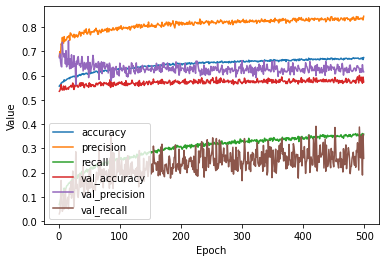

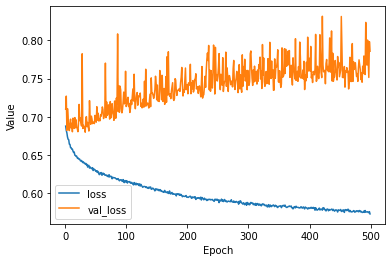

In [17]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 500
batch_size = 25
classification_threshold = 0.70
label_name = "label"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['loss', 'val_loss'])

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 1
Deep Neural Network:
* Input Layer: 431 nodes
* Hidden Layer 1: 431 nodes
* Hidden Layer 2: 40 nodes
* Ouput Layer: 1 node

Hyper-parameters:
* Loss Function: BinaryCrossEntropy
* Activation Function: Relu
* Optimizer Function: RMSprop
* Learning Rate: 0.001 
* Epochs: 500
* Batch_Size: 25
* Classification Threshold: 0.7
* Regularization: L2
* Regularization Lambda: 0.06

In [18]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of 431 nodes
    model.add(tf.keras.layers.Dense(units=431, input_shape=(431,)))
              
    # Implement L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=431, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.06),
                                  name='Hidden1'))
    
    # Implement L2 regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=40, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.06),
                                  name='Hidden2'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.1,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")  

Defined the create_model and train_model functions.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 431)               186192    
_________________________________________________________________
Hidden1 (Dense)              (None, 431)               186192    
_________________________________________________________________
Hidden2 (Dense)              (None, 40)                17280     
_________________________________________________________________
Output (Dense)               (None, 1)                 41        
Total params: 389,705
Trainable params: 389,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
350/350 [==============================] - 3s 9ms/step - loss: 2.3107 - accuracy: 0.5389 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6939 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch

350/350 [==============================] - 2s 6ms/step - loss: 0.6726 - accuracy: 0.5576 - precision: 0.7170 - recall: 0.0649 - val_loss: 0.6870 - val_accuracy: 0.5462 - val_precision: 0.6754 - val_recall: 0.0747
Epoch 33/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6715 - accuracy: 0.5602 - precision: 0.7486 - recall: 0.0674 - val_loss: 0.6886 - val_accuracy: 0.5449 - val_precision: 0.7033 - val_recall: 0.0621
Epoch 34/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6709 - accuracy: 0.5595 - precision: 0.7186 - recall: 0.0711 - val_loss: 0.6884 - val_accuracy: 0.5453 - val_precision: 0.6979 - val_recall: 0.0650
Epoch 35/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6701 - accuracy: 0.5606 - precision: 0.7408 - recall: 0.0704 - val_loss: 0.6912 - val_accuracy: 0.5321 - val_precision: 0.7143 - val_recall: 0.0145
Epoch 36/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6699 - accuracy: 0.5583 - preci

350/350 [==============================] - 1s 4ms/step - loss: 0.6509 - accuracy: 0.5734 - precision: 0.7508 - recall: 0.1101 - val_loss: 0.6874 - val_accuracy: 0.5421 - val_precision: 0.7123 - val_recall: 0.0504
Epoch 69/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.5790 - precision: 0.7496 - recall: 0.1288 - val_loss: 0.6870 - val_accuracy: 0.5421 - val_precision: 0.6782 - val_recall: 0.0572
Epoch 70/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.5749 - precision: 0.7504 - recall: 0.1151 - val_loss: 0.6838 - val_accuracy: 0.5513 - val_precision: 0.6441 - val_recall: 0.1106
Epoch 71/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6483 - accuracy: 0.5825 - precision: 0.7713 - recall: 0.1325 - val_loss: 0.6978 - val_accuracy: 0.5385 - val_precision: 0.6353 - val_recall: 0.0524
Epoch 72/500
350/350 [==============================] - 1s 3ms/step - loss: 0.6475 - accuracy: 0.5773 - preci

350/350 [==============================] - 2s 6ms/step - loss: 0.6383 - accuracy: 0.5843 - precision: 0.7529 - recall: 0.1447 - val_loss: 0.6898 - val_accuracy: 0.5467 - val_precision: 0.6395 - val_recall: 0.0912
Epoch 105/500
350/350 [==============================] - 2s 7ms/step - loss: 0.6358 - accuracy: 0.5824 - precision: 0.7361 - recall: 0.1450 - val_loss: 0.6904 - val_accuracy: 0.5554 - val_precision: 0.6339 - val_recall: 0.1377
Epoch 106/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6368 - accuracy: 0.5794 - precision: 0.7332 - recall: 0.1360 - val_loss: 0.6931 - val_accuracy: 0.5499 - val_precision: 0.6277 - val_recall: 0.1145
Epoch 107/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6376 - accuracy: 0.5809 - precision: 0.7582 - recall: 0.1318 - val_loss: 0.6893 - val_accuracy: 0.5641 - val_precision: 0.6468 - val_recall: 0.1688
Epoch 108/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6350 - accuracy: 0.5804 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.6326 - accuracy: 0.5816 - precision: 0.7476 - recall: 0.1377 - val_loss: 0.7149 - val_accuracy: 0.5293 - val_precision: 0.5366 - val_recall: 0.0213
Epoch 141/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6305 - accuracy: 0.5780 - precision: 0.7523 - recall: 0.1246 - val_loss: 0.6801 - val_accuracy: 0.5467 - val_precision: 0.6108 - val_recall: 0.1096
Epoch 142/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6315 - accuracy: 0.5818 - precision: 0.7477 - recall: 0.1385 - val_loss: 0.6971 - val_accuracy: 0.5449 - val_precision: 0.6350 - val_recall: 0.0844
Epoch 143/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6321 - accuracy: 0.5848 - precision: 0.7460 - recall: 0.1489 - val_loss: 0.6890 - val_accuracy: 0.5385 - val_precision: 0.6139 - val_recall: 0.0601
Epoch 144/500
350/350 [==============================] - 2s 6ms/step - loss: 0.6300 - accuracy: 0.5797 - p

350/350 [==============================] - 1s 4ms/step - loss: 0.6258 - accuracy: 0.5827 - precision: 0.7464 - recall: 0.1420 - val_loss: 0.7043 - val_accuracy: 0.5549 - val_precision: 0.6513 - val_recall: 0.1232
Epoch 177/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6263 - accuracy: 0.5807 - precision: 0.7503 - recall: 0.1338 - val_loss: 0.7113 - val_accuracy: 0.5462 - val_precision: 0.6333 - val_recall: 0.0921
Epoch 178/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6263 - accuracy: 0.5760 - precision: 0.7359 - recall: 0.1233 - val_loss: 0.7036 - val_accuracy: 0.5582 - val_precision: 0.6138 - val_recall: 0.1726
Epoch 179/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6274 - accuracy: 0.5784 - precision: 0.7534 - recall: 0.1253 - val_loss: 0.7016 - val_accuracy: 0.5485 - val_precision: 0.6772 - val_recall: 0.0834
Epoch 180/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6278 - accuracy: 0.5837 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.6221 - accuracy: 0.5817 - precision: 0.7651 - recall: 0.1320 - val_loss: 0.6854 - val_accuracy: 0.5430 - val_precision: 0.6138 - val_recall: 0.0863
Epoch 213/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6232 - accuracy: 0.5779 - precision: 0.7573 - recall: 0.1226 - val_loss: 0.7047 - val_accuracy: 0.5742 - val_precision: 0.6384 - val_recall: 0.2260
Epoch 214/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6266 - accuracy: 0.5800 - precision: 0.7401 - recall: 0.1353 - val_loss: 0.6867 - val_accuracy: 0.5398 - val_precision: 0.6102 - val_recall: 0.0698
Epoch 215/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6217 - accuracy: 0.5787 - precision: 0.7515 - recall: 0.1271 - val_loss: 0.7031 - val_accuracy: 0.5600 - val_precision: 0.6346 - val_recall: 0.1600
Epoch 216/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6241 - accuracy: 0.5808 - p

350/350 [==============================] - 2s 4ms/step - loss: 0.6231 - accuracy: 0.5754 - precision: 0.7621 - recall: 0.1131 - val_loss: 0.7127 - val_accuracy: 0.5495 - val_precision: 0.6284 - val_recall: 0.1115
Epoch 249/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6229 - accuracy: 0.5834 - precision: 0.7490 - recall: 0.1432 - val_loss: 0.6992 - val_accuracy: 0.5403 - val_precision: 0.6667 - val_recall: 0.0524
Epoch 250/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6217 - accuracy: 0.5812 - precision: 0.7549 - recall: 0.1340 - val_loss: 0.7093 - val_accuracy: 0.5481 - val_precision: 0.6122 - val_recall: 0.1164
Epoch 251/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6209 - accuracy: 0.5812 - precision: 0.7556 - recall: 0.1338 - val_loss: 0.6867 - val_accuracy: 0.5485 - val_precision: 0.6380 - val_recall: 0.1009
Epoch 252/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6192 - accuracy: 0.5826 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.6196 - accuracy: 0.5802 - precision: 0.7576 - recall: 0.1298 - val_loss: 0.7044 - val_accuracy: 0.5545 - val_precision: 0.6648 - val_recall: 0.1135
Epoch 285/500
350/350 [==============================] - 2s 4ms/step - loss: 0.6203 - accuracy: 0.5809 - precision: 0.7510 - recall: 0.1343 - val_loss: 0.6882 - val_accuracy: 0.5453 - val_precision: 0.6173 - val_recall: 0.0970
Epoch 286/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6213 - accuracy: 0.5760 - precision: 0.7565 - recall: 0.1166 - val_loss: 0.6955 - val_accuracy: 0.5568 - val_precision: 0.6438 - val_recall: 0.1368
Epoch 287/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6178 - accuracy: 0.5786 - precision: 0.7564 - recall: 0.1251 - val_loss: 0.6978 - val_accuracy: 0.5577 - val_precision: 0.6349 - val_recall: 0.1484
Epoch 288/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6204 - accuracy: 0.5823 - p

350/350 [==============================] - 1s 4ms/step - loss: 0.6189 - accuracy: 0.5784 - precision: 0.7620 - recall: 0.1226 - val_loss: 0.6934 - val_accuracy: 0.5517 - val_precision: 0.6605 - val_recall: 0.1038
Epoch 321/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6203 - accuracy: 0.5803 - precision: 0.7665 - recall: 0.1273 - val_loss: 0.6931 - val_accuracy: 0.5549 - val_precision: 0.6311 - val_recall: 0.1377
Epoch 322/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.5820 - precision: 0.7594 - recall: 0.1350 - val_loss: 0.6975 - val_accuracy: 0.5495 - val_precision: 0.6257 - val_recall: 0.1135
Epoch 323/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6202 - accuracy: 0.5820 - precision: 0.7740 - recall: 0.1303 - val_loss: 0.6972 - val_accuracy: 0.5618 - val_precision: 0.6321 - val_recall: 0.1717
Epoch 324/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6186 - accuracy: 0.5781 - p

350/350 [==============================] - 1s 4ms/step - loss: 0.6146 - accuracy: 0.5833 - precision: 0.7533 - recall: 0.1412 - val_loss: 0.6965 - val_accuracy: 0.5481 - val_precision: 0.6897 - val_recall: 0.0776
Epoch 357/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6161 - accuracy: 0.5813 - precision: 0.7545 - recall: 0.1345 - val_loss: 0.7121 - val_accuracy: 0.5343 - val_precision: 0.5921 - val_recall: 0.0436
Epoch 358/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6173 - accuracy: 0.5772 - precision: 0.7408 - recall: 0.1258 - val_loss: 0.7026 - val_accuracy: 0.5705 - val_precision: 0.6495 - val_recall: 0.1959
Epoch 359/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6168 - accuracy: 0.5818 - precision: 0.7559 - recall: 0.1355 - val_loss: 0.7254 - val_accuracy: 0.5408 - val_precision: 0.6489 - val_recall: 0.0592
Epoch 360/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6162 - accuracy: 0.5801 - p

350/350 [==============================] - 2s 5ms/step - loss: 0.6137 - accuracy: 0.5801 - precision: 0.7634 - recall: 0.1275 - val_loss: 0.6928 - val_accuracy: 0.5595 - val_precision: 0.6468 - val_recall: 0.1474
Epoch 393/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6162 - accuracy: 0.5841 - precision: 0.7523 - recall: 0.1442 - val_loss: 0.7083 - val_accuracy: 0.5609 - val_precision: 0.6452 - val_recall: 0.1552
Epoch 394/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6166 - accuracy: 0.5829 - precision: 0.7325 - recall: 0.1484 - val_loss: 0.6865 - val_accuracy: 0.5549 - val_precision: 0.6347 - val_recall: 0.1348
Epoch 395/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6164 - accuracy: 0.5839 - precision: 0.7597 - recall: 0.1407 - val_loss: 0.6928 - val_accuracy: 0.5632 - val_precision: 0.6598 - val_recall: 0.1542
Epoch 396/500
350/350 [==============================] - 2s 5ms/step - loss: 0.6177 - accuracy: 0.5836 - p

350/350 [==============================] - 2s 4ms/step - loss: 0.6140 - accuracy: 0.5774 - precision: 0.7430 - recall: 0.1258 - val_loss: 0.6999 - val_accuracy: 0.5549 - val_precision: 0.6385 - val_recall: 0.1319
Epoch 429/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6144 - accuracy: 0.5828 - precision: 0.7534 - recall: 0.1397 - val_loss: 0.7159 - val_accuracy: 0.5408 - val_precision: 0.6148 - val_recall: 0.0727
Epoch 430/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6139 - accuracy: 0.5779 - precision: 0.7655 - recall: 0.1201 - val_loss: 0.7195 - val_accuracy: 0.5618 - val_precision: 0.6370 - val_recall: 0.1668
Epoch 431/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.5803 - precision: 0.7536 - recall: 0.1315 - val_loss: 0.7094 - val_accuracy: 0.5531 - val_precision: 0.6571 - val_recall: 0.1115
Epoch 432/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6129 - accuracy: 0.5832 - p

350/350 [==============================] - 1s 4ms/step - loss: 0.6124 - accuracy: 0.5817 - precision: 0.7521 - recall: 0.1365 - val_loss: 0.6974 - val_accuracy: 0.5513 - val_precision: 0.6509 - val_recall: 0.1067
Epoch 465/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.5802 - precision: 0.7483 - recall: 0.1330 - val_loss: 0.7143 - val_accuracy: 0.5554 - val_precision: 0.6596 - val_recall: 0.1203
Epoch 466/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6137 - accuracy: 0.5760 - precision: 0.7540 - recall: 0.1174 - val_loss: 0.7244 - val_accuracy: 0.5435 - val_precision: 0.6149 - val_recall: 0.0883
Epoch 467/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6133 - accuracy: 0.5765 - precision: 0.7535 - recall: 0.1193 - val_loss: 0.6917 - val_accuracy: 0.5540 - val_precision: 0.6792 - val_recall: 0.1048
Epoch 468/500
350/350 [==============================] - 1s 4ms/step - loss: 0.6137 - accuracy: 0.5753 - p

350/350 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.5805 - precision: 0.7507 - recall: 0.1333 - val_loss: 0.7075 - val_accuracy: 0.5554 - val_precision: 0.6376 - val_recall: 0.1348
Training Performance
---------------------------------
loss:  0.6138066649436951
accuracy:  0.5915283560752869
precision:  0.7472766637802124
recall:  0.17056190967559814

Validation Performance
---------------------------------
loss:  0.7074731588363647
accuracy:  0.555402934551239
precision:  0.6376146674156189
recall:  0.13482056558132172


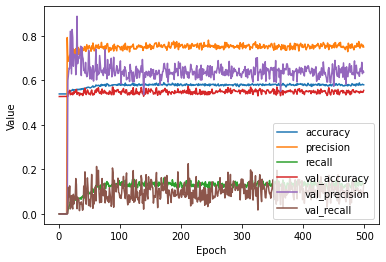

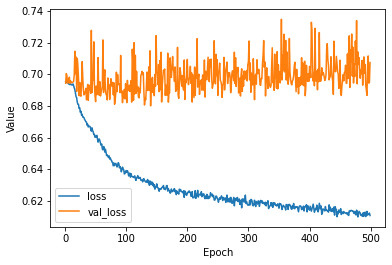

In [19]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 500
batch_size = 25
classification_threshold = 0.70
label_name = "label"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['loss', 'val_loss'])

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 2
Deep Neural Network:
* Input Layer: 431 nodes
* Hidden Layer 1: 431 nodes
* Hidden Layer 2: 40 nodes
* Ouput Layer: 1 node

Hyper-parameters:
* Loss Function: BinaryCrossEntropy
* Activation Function: Relu
* Optimizer Function: Adam
* Learning Rate: 0.001 
* Epochs: 500
* Batch_Size: 25
* Classification Threshold: 0.7
* Regularization: L2
* Regularization Lambda: 0.05

In [20]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of 431 nodes
    model.add(tf.keras.layers.Dense(units=431, input_shape=(431,)))
              
    # Implement L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=431, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.005),
                                  name='Hidden1'))
    
    # Implement L2 regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=40, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.005),
                                  name='Hidden2'))
    
    # Implement L2 regularization in the third hidden layer.
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.005),
                                  name='Hidden3'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.1,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")  

Defined the create_model and train_model functions.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 431)               186192    
_________________________________________________________________
Hidden1 (Dense)              (None, 431)               186192    
_________________________________________________________________
Hidden2 (Dense)              (None, 40)                17280     
_________________________________________________________________
Hidden3 (Dense)              (None, 20)                820       
_________________________________________________________________
Output (Dense)               (None, 1)                 21        
Total params: 390,505
Trainable params: 390,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
175/175 [==============================] - 1s 7ms/step - loss: 0.9108 - accuracy: 0.5383 - precision: 

Epoch 31/100
175/175 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 32/100
175/175 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6926 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 33/100
175/175 [==============================] - 1s 6ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 34/100
175/175 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 35/100
175/175 [==========

Epoch 65/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 66/100
175/175 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 67/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 68/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 69/100
175/175 [==========

Epoch 99/100
175/175 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 100/100
175/175 [==============================] - 1s 6ms/step - loss: 0.6912 - accuracy: 0.5396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.5279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


NameError: name 'my_model2' is not defined

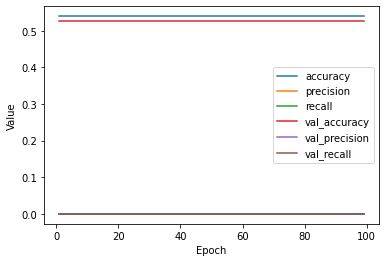

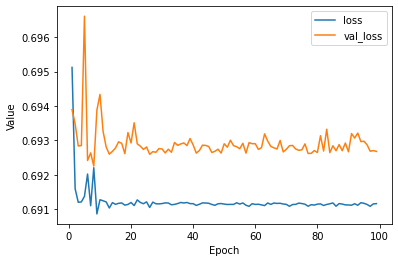

In [21]:
# The following variables are the hyperparameters.
learning_rate = 0.002
epochs = 100
batch_size = 50
classification_threshold = 0.70
label_name = "label"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

# Print the models structure
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['loss', 'val_loss'])

training_performance =  my_model2.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model2.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])